### World Happiness Report

### Overview
-The World Happiness Report is a publication from the United Nations Sustainable Development Solution Network

-It ranks national happiness based on respondent rating their own lives (0 to 10)

-The happiness score are based on the Cantril ladder survey

-The data is based on survey scores, using the Gallup weights 

-Each annual report is available to the public to download on the World Happiness Report website


### Problem Description

Predict whether the World Happiness Report can predict the ladder score 

Experience: World Happiness Report from 2006 - Currently

Method: Linear Regression - Classification Accuracy & Coefficient List

Method: KNN - Metric Classification Report

Method: Random Forest Classifier - Metrics Classification Report

Method: xgboost- Metrics Classification Report


### Data Discovery

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#The datasets of the world Happiness Report
import pandas as pd
whr_2021 = pd.read_csv('World_Happiness_Report/world-happiness-report-2021.csv')
past_whr = pd.read_csv('World_Happiness_Report/world-happiness-report.csv')


### Discovering the 2021 World Happiness Report
<li>Looking at the current data</li>
<li>Adjusting and renaming the columns</li>
<li>Looking a the data information</li>
<li>Checking the null values</li>
<li>Cleaning up the null values </li>
<li>Looking at the data shape</li>

In [2]:
#Taking a peak at the data
whr_2021.head(3)

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  
2                                    0.413                2.839

In [3]:
#The adjusting the colums with the following function below

new_whr_2021 = []

for i in whr_2021.columns:
    new_whr_2021.append(i.lower().replace(' ', '_'))

In [4]:
whr_2021.columns = new_whr_2021

In [5]:
#Identifying the indexs

whr_2021.columns

Index(['country_name', 'regional_indicator', 'ladder_score',
       'standard_error_of_ladder_score', 'upperwhisker', 'lowerwhisker',
       'logged_gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'ladder_score_in_dystopia',
       'explained_by:_log_gdp_per_capita', 'explained_by:_social_support',
       'explained_by:_healthy_life_expectancy',
       'explained_by:_freedom_to_make_life_choices',
       'explained_by:_generosity', 'explained_by:_perceptions_of_corruption',
       'dystopia_+_residual'],
      dtype='object')

In [6]:
#Rename the columns

whr_2021.rename(columns = {'country_name' : 'country',
                    'regional_indicator' : 'region',
                    'life_ladder' : 'ladder_score',
                    'logged_gdp_per_capita' : 'gdp_per_capita',
                    'social_support' : 'social_support',
                    'healthy_life_expectancy' : 'life_expectancy',
                    'freedom_to_make_life_choices' : 'freedom',
                    'generosity' : 'generosity',
                    'perceptions_of_corruption' : 'corruption'
                          },
           inplace=True)

In [7]:
#Checking the null values

whr_2021.isna().sum()

country                                       0
region                                        0
ladder_score                                  0
standard_error_of_ladder_score                0
upperwhisker                                  0
lowerwhisker                                  0
gdp_per_capita                                0
social_support                                0
life_expectancy                               0
freedom                                       0
generosity                                    0
corruption                                    0
ladder_score_in_dystopia                      0
explained_by:_log_gdp_per_capita              0
explained_by:_social_support                  0
explained_by:_healthy_life_expectancy         0
explained_by:_freedom_to_make_life_choices    0
explained_by:_generosity                      0
explained_by:_perceptions_of_corruption       0
dystopia_+_residual                           0
dtype: int64

In [8]:
#Looking at the rows and columns

whr_2021.shape

(149, 20)

In [9]:
#Getting the summary statistics

whr_2021.describe()

ladder_score  standard_error_of_ladder_score  upperwhisker  \
count    149.000000                      149.000000    149.000000   
mean       5.532839                        0.058752      5.648007   
std        1.073924                        0.022001      1.054330   
min        2.523000                        0.026000      2.596000   
25%        4.852000                        0.043000      4.991000   
50%        5.534000                        0.054000      5.625000   
75%        6.255000                        0.070000      6.344000   
max        7.842000                        0.173000      7.904000   

       lowerwhisker  gdp_per_capita  social_support  life_expectancy  \
count    149.000000      149.000000      149.000000       149.000000   
mean       5.417631        9.432208        0.814745        64.992799   
std        1.094879        1.158601        0.114889         6.762043   
min        2.449000        6.635000        0.463000        48.478000   
25%        4.706000        8.541000        0.750000        59.802000   
50%        5.413000        9.569000        0.832000        66.603000   
75%        6.128000       10.421000        0.905000        69.600000   
max        7.780000       11.647000        0.983000        76.953000   

          freedom  generosity  corruption  ladder_score_in_dystopia  \
count  149.000000  149.000000  149.000000              1.490000e+02   
mean     0.791597   -0.015134    0.727450              2.430000e+00   
std      0.113332    0.150657    0.179226              5.347044e-15   
min      0.382000   -0.288000    0.082000              2.430000e+00   
25%      0.718000   -0.126000    0.667000              2.430000e+00   
50%      0.804000   -0.036000    0.781000              2.430000e+00   
75%      0.877000    0.079000    0.845000              2.430000e+00   
max      0.970000    0.542000    0.939000              2.430000e+00   

       explained_by:_log_gdp_per_capita  explained_by:_social_support  \
count                        149.000000                    149.000000   
mean                           0.977161                      0.793315   
std                            0.404740                      0.258871   
min                            0.000000                      0.000000   
25%                            0.666000                      0.647000   
50%                            1.025000                      0.832000   
75%                            1.323000                      0.996000   
max                            1.751000                      1.172000   

       explained_by:_healthy_life_expectancy  \
count                             149.000000   
mean                                0.520161   
std                                 0.213019   
min                                 0.000000   
25%                                 0.357000   
50%                                 0.571000   
75%                                 0.665000   
max                                 0.897000   

       explained_by:_freedom_to_make_life_choices  explained_by:_generosity  \
count                                  149.000000                149.000000   
mean                                     0.498711                  0.178047   
std                                      0.137888                  0.098270   
min                                      0.000000                  0.000000   
25%                                      0.409000                  0.105000   
50%                                      0.514000                  0.164000   
75%                                      0.603000                  0.239000   
max                                      0.716000                  0.541000   

       explained_by:_perceptions_of_corruption  dystopia_+_residual  
count                               149.000000           149.000000  
mean                                  0.135141             2.430329  
std                                   0.114361             0.537645  
min          

### Discovering the past World Happiness Report
<li>Looking at the current data</li>
<li>Adjusting and renaming the columns</li>
<li>Looking a the data information</li>
<li>Checking the null values</li>
<li>Looking at the data shape</li>

In [10]:
#The adjusting the colums
new_past_whr = []

for i in past_whr.columns:
    new_past_whr.append(i.lower().replace(' ', '_'))

In [11]:
past_whr.columns = new_past_whr

In [12]:
past_whr.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect'],
      dtype='object')

In [13]:
past_whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   life_ladder                       1949 non-null   float64
 3   log_gdp_per_capita                1913 non-null   float64
 4   social_support                    1936 non-null   float64
 5   healthy_life_expectancy_at_birth  1894 non-null   float64
 6   freedom_to_make_life_choices      1917 non-null   float64
 7   generosity                        1860 non-null   float64
 8   perceptions_of_corruption         1839 non-null   float64
 9   positive_affect                   1927 non-null   float64
 10  negative_affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [14]:
#Checking the null values
past_whr.isna().sum()

country_name                          0
year                                  0
life_ladder                           0
log_gdp_per_capita                   36
social_support                       13
healthy_life_expectancy_at_birth     55
freedom_to_make_life_choices         32
generosity                           89
perceptions_of_corruption           110
positive_affect                      22
negative_affect                      16
dtype: int64

In [15]:
#Replacing all the null values with the mean
#All the null values have the data type of float64

for i in past_whr.columns:
    if past_whr[i].dtype != "float64" :
        pass
    else:
        past_whr[i] = past_whr[i].fillna(past_whr[i].mean())

In [16]:
past_whr.isna().sum()

country_name                        0
year                                0
life_ladder                         0
log_gdp_per_capita                  0
social_support                      0
healthy_life_expectancy_at_birth    0
freedom_to_make_life_choices        0
generosity                          0
perceptions_of_corruption           0
positive_affect                     0
negative_affect                     0
dtype: int64

In [17]:
#The past_whr contains past World Happiness Reports from 2006 to 2020

past_whr[(past_whr.country_name == 'Finland')].groupby('year').head()

country_name  year  life_ladder  log_gdp_per_capita  social_support  \
551      Finland  2006        7.672              10.745           0.965   
552      Finland  2008        7.671              10.796           0.951   
553      Finland  2010        7.393              10.734           0.935   
554      Finland  2011        7.354              10.754           0.938   
555      Finland  2012        7.420              10.735           0.928   
556      Finland  2013        7.445              10.722           0.941   
557      Finland  2014        7.385              10.714           0.952   
558      Finland  2015        7.448              10.716           0.948   
559      Finland  2016        7.660              10.740           0.954   
560      Finland  2017        7.788              10.768           0.964   
561      Finland  2018        7.858              10.783           0.962   
562      Finland  2019        7.780              10.792           0.937   
563      Finland  2020        7.889              10.750           0.962   

     healthy_life_expectancy_at_birth  freedom_to_make_life_choices  \
551                             69.76                         0.969   
552                             70.08                         0.934   
553                             70.40                         0.916   
554                             70.64                         0.936   
555                             70.88                         0.921   
556                             71.12                         0.919   
557                             71.36                         0.933   
558                             71.60                         0.930   
559                             71.70                         0.948   
560                             71.80                         0.962   
561                             71.90                         0.938   
562                             72.00                         0.948   
563                             72.10                         0.962   

     generosity  perceptions_of_corruption  positive_affect  negative_affect  
551      -0.005                      0.132            0.722            0.172  
552       0.028                      0.217            0.773            0.144  
553       0.091                      0.413            0.832            0.202  
554       0.101                      0.320            0.773            0.205  
555      -0.001                      0.361            0.796            0.202  
556       0.040                      0.306            0.769            0.195  
557      -0.001                      0.265            0.784            0.199  
558       0.111                      0.223            0.751            0.191  
559      -0.027                      0.250            0.797            0.182  
560      -0.002                      0.192            0.787            0.176  
561      -0.127                      0.199            0.782            0.182  
562      -0.052                      0.195            0.755            0.181  
563      -0.116                      0.164            0.744            0.193

In [18]:
past_whr.shape

(1949, 11)

In [19]:
#The summary statistics of the non-null data

past_whr.describe()

year  life_ladder  log_gdp_per_capita  social_support  \
count  1949.000000  1949.000000         1949.000000     1949.000000   
mean   2013.216008     5.466705            9.368453        0.812552   
std       4.166828     1.115711            1.143370        0.118086   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.478000        0.751000   
50%    2013.000000     5.386000            9.443000        0.834000   
75%    2017.000000     6.283000           10.335000        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       healthy_life_expectancy_at_birth  freedom_to_make_life_choices  \
count                       1949.000000                   1949.000000   
mean                          63.359374                      0.742558   
std                            7.403463                      0.140921   
min                           32.300000                      0.258000   
25%                           58.900000                      0.649000   
50%                           65.000000                      0.759000   
75%                           68.400000                      0.854000   
max                           77.100000                      0.985000   

        generosity  perceptions_of_corruption  positive_affect  \
count  1949.000000                1949.000000      1949.000000   
mean      0.000103                   0.747125         0.710003   
std       0.158466                   0.181438         0.106493   
min      -0.335000                   0.035000         0.322000   
25%      -0.106000                   0.699000         0.627000   
50%      -0.016000                   0.793000         0.718000   
75%       0.085000                   0.868000         0.798000   
max       0.698000                   0.983000         0.944000   

       negative_affect  
count      1949.000000  
mean          0.268544  
std           0.084818  
min           0.083000  
25%           0.207000  
50%           0.260000  
75%           0.319000  
max           0.705000

<b> Cleaning and Merging the data.</b>
<p> In this section, I will be cleaning the 2021 World Happiness Report</p>

In [20]:
#Adding 2021 Year column to the whr_2021 dataframe

whr_2021['year'] = '2021'

move = whr_2021['year']
whr_2021.drop(labels=['year'], axis=1, inplace = True)
whr_2021.insert(1, 'year', move)
whr_2021.head(2)

country  year          region  ladder_score  \
0  Finland  2021  Western Europe         7.842   
1  Denmark  2021  Western Europe         7.620   

   standard_error_of_ladder_score  upperwhisker  lowerwhisker  gdp_per_capita  \
0                           0.032         7.904         7.780          10.775   
1                           0.035         7.687         7.552          10.933   

   social_support  life_expectancy  ...  generosity  corruption  \
0           0.954             72.0  ...      -0.098       0.186   
1           0.954             72.7  ...       0.030       0.179   

   ladder_score_in_dystopia  explained_by:_log_gdp_per_capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   

   explained_by:_social_support  explained_by:_healthy_life_expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   

   explained_by:_freedom_to_make_life_choices  explained_by:_generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   

   explained_by:_perceptions_of_corruption  dystopia_+_residual  
0                                    0.481                3.253  
1                                    0.485                2.868  

[2 rows x 21 columns]

In [21]:
#Creating a new dataframe called Refined World Happiness Report by dropping columns I will not use in the analysis

rf_whr_2021 = whr_2021.drop(['standard_error_of_ladder_score', 
                                            'upperwhisker', 
                                            'lowerwhisker',
                                            'ladder_score_in_dystopia',
                                            'explained_by:_log_gdp_per_capita',
                                            'explained_by:_social_support',
                                            'explained_by:_healthy_life_expectancy',
                                            'explained_by:_freedom_to_make_life_choices',
                                            'explained_by:_generosity',
                                            'explained_by:_perceptions_of_corruption',
                                            'dystopia_+_residual'],
                                            axis = 1)

In [22]:
#Checking the new dataframe

rf_whr_2021.head(3)

country  year          region  ladder_score  gdp_per_capita  \
0      Finland  2021  Western Europe         7.842          10.775   
1      Denmark  2021  Western Europe         7.620          10.933   
2  Switzerland  2021  Western Europe         7.571          11.117   

   social_support  life_expectancy  freedom  generosity  corruption  
0           0.954             72.0    0.949      -0.098       0.186  
1           0.954             72.7    0.946       0.030       0.179  
2           0.942             74.4    0.919       0.025       0.292

In [23]:
rf_whr_2021.shape

(149, 10)

<b> Cleaning and Merging the data.</b>
<p> In this section, I will be cleaning the Past World Happiness Report</p>

In [24]:
#Clean the past whr data frame
#Renaming the columns in past_whr
past_whr.rename(columns = {'country_name' : 'country',
                    'life_ladder' : 'ladder_score',
                    'log_gdp_per_capita' : 'gdp_per_capita',
                    'social_support' : 'social_support',
                    'healthy_life_expectancy_at_birth' : 'life_expectancy',
                    'freedom_to_make_life_choices' : 'freedom',
                    'generosity' : 'generosity',
                    'perceptions_of_corruption' : 'corruption',
                    'positive_affect' : 'positive_affect',
                    'negative_affect' : 'negative_affect'},
           inplace=True)

In [25]:
past_whr.describe()

year  ladder_score  gdp_per_capita  social_support  \
count  1949.000000   1949.000000     1949.000000     1949.000000   
mean   2013.216008      5.466705        9.368453        0.812552   
std       4.166828      1.115711        1.143370        0.118086   
min    2005.000000      2.375000        6.635000        0.290000   
25%    2010.000000      4.640000        8.478000        0.751000   
50%    2013.000000      5.386000        9.443000        0.834000   
75%    2017.000000      6.283000       10.335000        0.905000   
max    2020.000000      8.019000       11.648000        0.987000   

       life_expectancy      freedom   generosity   corruption  \
count      1949.000000  1949.000000  1949.000000  1949.000000   
mean         63.359374     0.742558     0.000103     0.747125   
std           7.403463     0.140921     0.158466     0.181438   
min          32.300000     0.258000    -0.335000     0.035000   
25%          58.900000     0.649000    -0.106000     0.699000   
50%          65.000000     0.759000    -0.016000     0.793000   
75%          68.400000     0.854000     0.085000     0.868000   
max          77.100000     0.985000     0.698000     0.983000   

       positive_affect  negative_affect  
count      1949.000000      1949.000000  
mean          0.710003         0.268544  
std           0.106493         0.084818  
min           0.322000         0.083000  
25%           0.627000         0.207000  
50%           0.718000         0.260000  
75%           0.798000         0.319000  
max           0.944000         0.705000

In [26]:
#Inserting region feature from the whr_2021 to past_whr

import numpy as np
import warnings
warnings.filterwarnings("ignore")


past_whr['region'] = np.nan

for i,country in enumerate(whr_2021.country):
    if past_whr['country'].eq(country).any(0):
        ind = past_whr.index[past_whr.eq(country).any(1)]
        past_whr['region'][ind] = whr_2021.region[i]
        
past_whr.head(3)

country  year  ladder_score  gdp_per_capita  social_support  \
0  Afghanistan  2008         3.724           7.370           0.451   
1  Afghanistan  2009         4.402           7.540           0.552   
2  Afghanistan  2010         4.758           7.647           0.539   

   life_expectancy  freedom  generosity  corruption  positive_affect  \
0             50.8    0.718       0.168       0.882            0.518   
1             51.2    0.679       0.190       0.850            0.584   
2             51.6    0.600       0.121       0.707            0.618   

   negative_affect      region  
0            0.258  South Asia  
1            0.237  South Asia  
2            0.275  South Asia

In [27]:
past_whr.isna().sum()

country             0
year                0
ladder_score        0
gdp_per_capita      0
social_support      0
life_expectancy     0
freedom             0
generosity          0
corruption          0
positive_affect     0
negative_affect     0
region             63
dtype: int64

In [28]:
past_whr.region.unique()

array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', nan, 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Sub-Saharan Africa', 'Southeast Asia',
       'East Asia'], dtype=object)

In [29]:
#Adding the region column to the past_whr dataframe 

null_region = past_whr[past_whr['region'].isnull()]
null_region['country'].unique()

array(['Angola', 'Belize', 'Bhutan', 'Central African Republic',
       'Congo (Kinshasa)', 'Cuba', 'Djibouti', 'Guyana', 'Oman', 'Qatar',
       'Somalia', 'Somaliland region', 'South Sudan', 'Sudan', 'Suriname',
       'Syria', 'Trinidad and Tobago'], dtype=object)

In [30]:
#Using a loop fix the null regions

region_fix = []

for country in past_whr['country']:
    if country == 'Angola':
        region_fix.append('Sub-Saharan Africa')
    if country == 'Belize':
        region_fix.append('Latin America and Caribbean')
    if country == 'Bhutan':
        region_fix.append('South Asia')
    if country == 'Central African Republic':
        region_fix.append('Sub-Saharan Africa')
    if country == 'Congo (Kinshasa)':
        region_fix.append('Sub-Saharan Africa')
    if country == 'Cuba':
        region_fix.append('Latin America and Caribbean')
    if country == 'Djibouti':
        region_fix.append('Middle East and North Africa')
    if country == 'Guyana':
        region_fix.append('Latin America and Caribbean') 
    if country == 'Oman':
        region_fix.append('Middle East and North Africa')  
    if country == 'Qatar':
        region_fix.append('Middle East and North Africa') 
    if country == 'Somalia':
        region_fix.append('Middle East and North Africa') 
    if country == 'Somaliland region':
        region_fix.append('Sub-Saharan Africa') 
    if country == 'South Sudan':
        region_fix.append('Sub-Saharan Africa') 
    if country == 'Sudan':
        region_fix.append('Middle East and North Africa')  
    if country == 'Suriname':
        region_fix.append('Latin America and Caribbean') 
    if country == 'Syria':
        region_fix.append('Middle East and North Africa') 
    if country == 'Trinidad and Tobago':
        region_fix.append('Latin America and Caribbean')    

for i,j in zip(null_region.index,range(len(null_region))):
    past_whr['region'][i] = region_fix[j]

In [31]:
past_whr.isnull().sum()

country            0
year               0
ladder_score       0
gdp_per_capita     0
social_support     0
life_expectancy    0
freedom            0
generosity         0
corruption         0
positive_affect    0
negative_affect    0
region             0
dtype: int64

In [32]:
#Re-index the past_whr
move = past_whr['region']
past_whr.drop(labels=['region'], axis=1, inplace = True)
past_whr.insert(2, 'region', move)
past_whr.head(2)

country  year      region  ladder_score  gdp_per_capita  \
0  Afghanistan  2008  South Asia         3.724            7.37   
1  Afghanistan  2009  South Asia         4.402            7.54   

   social_support  life_expectancy  freedom  generosity  corruption  \
0           0.451             50.8    0.718       0.168       0.882   
1           0.552             51.2    0.679       0.190       0.850   

   positive_affect  negative_affect  
0            0.518            0.258  
1            0.584            0.237

In [33]:
rf_past_whr = past_whr.drop(['positive_affect',
                            'negative_affect'], 
                           axis = 1)

In [34]:
#Create most recent index year of past World Happiness Report

grouped= rf_past_whr.groupby('country')
most_recent_year = grouped.max()
r_past_whr = most_recent_year
r_past_whr.dropna().reset_index()

country  year                        region  ladder_score  \
0    Afghanistan  2019                    South Asia         4.758   
1        Albania  2020    Central and Eastern Europe         5.867   
2        Algeria  2019  Middle East and North Africa         6.355   
3         Angola  2014            Sub-Saharan Africa         5.589   
4      Argentina  2020   Latin America and Caribbean         6.776   
..           ...   ...                           ...           ...   
161    Venezuela  2020   Latin America and Caribbean         7.478   
162      Vietnam  2019                Southeast Asia         5.767   
163        Yemen  2019  Middle East and North Africa         4.809   
164       Zambia  2020            Sub-Saharan Africa         5.260   
165     Zimbabwe  2020            Sub-Saharan Africa         4.955   

     gdp_per_capita  social_support  life_expectancy   freedom  generosity  \
0          7.725000           0.559             53.2  0.718000    0.236000   
1          9.544000           0.833             69.3  0.824000    0.009000   
2          9.362000           0.839             66.1  0.742558    0.005000   
3          9.017000           0.755             54.6  0.584000    0.055000   
4         10.112000           0.938             69.2  0.881000   -0.122000   
..              ...             ...              ...       ...         ...   
161        9.826000           0.955             66.9  0.838000    0.000103   
162        8.992000           0.898             68.1  0.952000    0.201000   
163        9.368453           0.870             57.5  0.706000    0.011000   
164        8.167000           0.864             56.3  0.823000    0.140000   
165        8.049000           0.896             56.8  0.763000   -0.009000   

     corruption  
0         0.954  
1         0.914  
2         0.759  
3         0.911  
4         0.885  
..          ...  
161       0.890  
162       0.838  
163       0.885  
164       0.948  
165       0.964  

[166 rows x 10 columns]

## Concatenating the dataframes

In [35]:
whr = pd.concat([rf_whr_2021, rf_past_whr], axis=0)

In [36]:
whr.describe()

ladder_score  gdp_per_capita  social_support  life_expectancy  \
count   2098.000000     2098.000000     2098.000000      2098.000000   
mean       5.471402        9.372981        0.812708        63.475380   
std        1.112676        1.144297        0.117836         7.370209   
min        2.375000        6.635000        0.290000        32.300000   
25%        4.652250        8.483000        0.750000        59.000000   
50%        5.392000        9.449500        0.834000        65.100000   
75%        6.282500       10.343750        0.905000        68.535000   
max        8.019000       11.648000        0.987000        77.100000   

           freedom   generosity   corruption  
count  2098.000000  2098.000000  2098.000000  
mean      0.746040    -0.000979     0.745728  
std       0.139689     0.157938     0.181310  
min       0.258000    -0.335000     0.035000  
25%       0.654250    -0.109000     0.698000  
50%       0.764000    -0.017000     0.793000  
75%       0.858000     0.084000     0.866000  
max       0.985000     0.698000     0.983000

In [37]:
# This dataframe includes all World Happiness Report from 2006 to 2021
whr[(whr.country == 'Panama')].groupby('year').head()

country  year                       region  ladder_score  gdp_per_capita  \
40    Panama  2021  Latin America and Caribbean         6.180          10.350   
1339  Panama  2006  Latin America and Caribbean         6.128           9.764   
1340  Panama  2007  Latin America and Caribbean         6.894           9.859   
1341  Panama  2008  Latin America and Caribbean         6.931           9.935   
1342  Panama  2009  Latin America and Caribbean         7.034           9.930   
1343  Panama  2010  Latin America and Caribbean         7.321           9.969   
1344  Panama  2011  Latin America and Caribbean         7.248          10.059   
1345  Panama  2012  Latin America and Caribbean         6.860          10.135   
1346  Panama  2013  Latin America and Caribbean         6.866          10.184   
1347  Panama  2014  Latin America and Caribbean         6.631          10.217   
1348  Panama  2015  Latin America and Caribbean         6.606          10.255   
1349  Panama  2016  Latin America and Caribbean         6.118          10.287   
1350  Panama  2017  Latin America and Caribbean         6.568          10.324   
1351  Panama  2018  Latin America and Caribbean         6.281          10.343   
1352  Panama  2019  Latin America and Caribbean         6.086          10.356   

      social_support  life_expectancy  freedom  generosity  corruption  
40             0.896           69.652    0.872      -0.166       0.856  
1339           0.951           67.900    0.882      -0.047       0.912  
1340           0.937           68.000    0.640       0.083       0.915  
1341           0.922           68.100    0.707       0.060       0.881  
1342           0.905           68.200    0.721       0.014       0.889  
1343           0.928           68.300    0.755      -0.009       0.880  
1344           0.876           68.500    0.829       0.009       0.840  
1345           0.897           68.700    0.783      -0.002       0.796  
1346           0.896           68.900    0.811       0.018       0.814  
1347           0.873           69.100    0.894       0.002       0.847  
1348           0.883           69.300    0.847      -0.007       0.810  
1349           0.882           69.400    0.884      -0.102       0.837  
1350           0.912           69.500    0.900      -0.170       0.841  
1351           0.904           69.600    0.861      -0.131       0.837  
1352           0.886           69.700    0.883      -0.199       0.869

### Data Analysis

<b>Data Analysis on the World Happiness Report

Pairplot visualizes given 2021 World Happiness Report to find the relationship between them where the variables can be continuous or categorical.

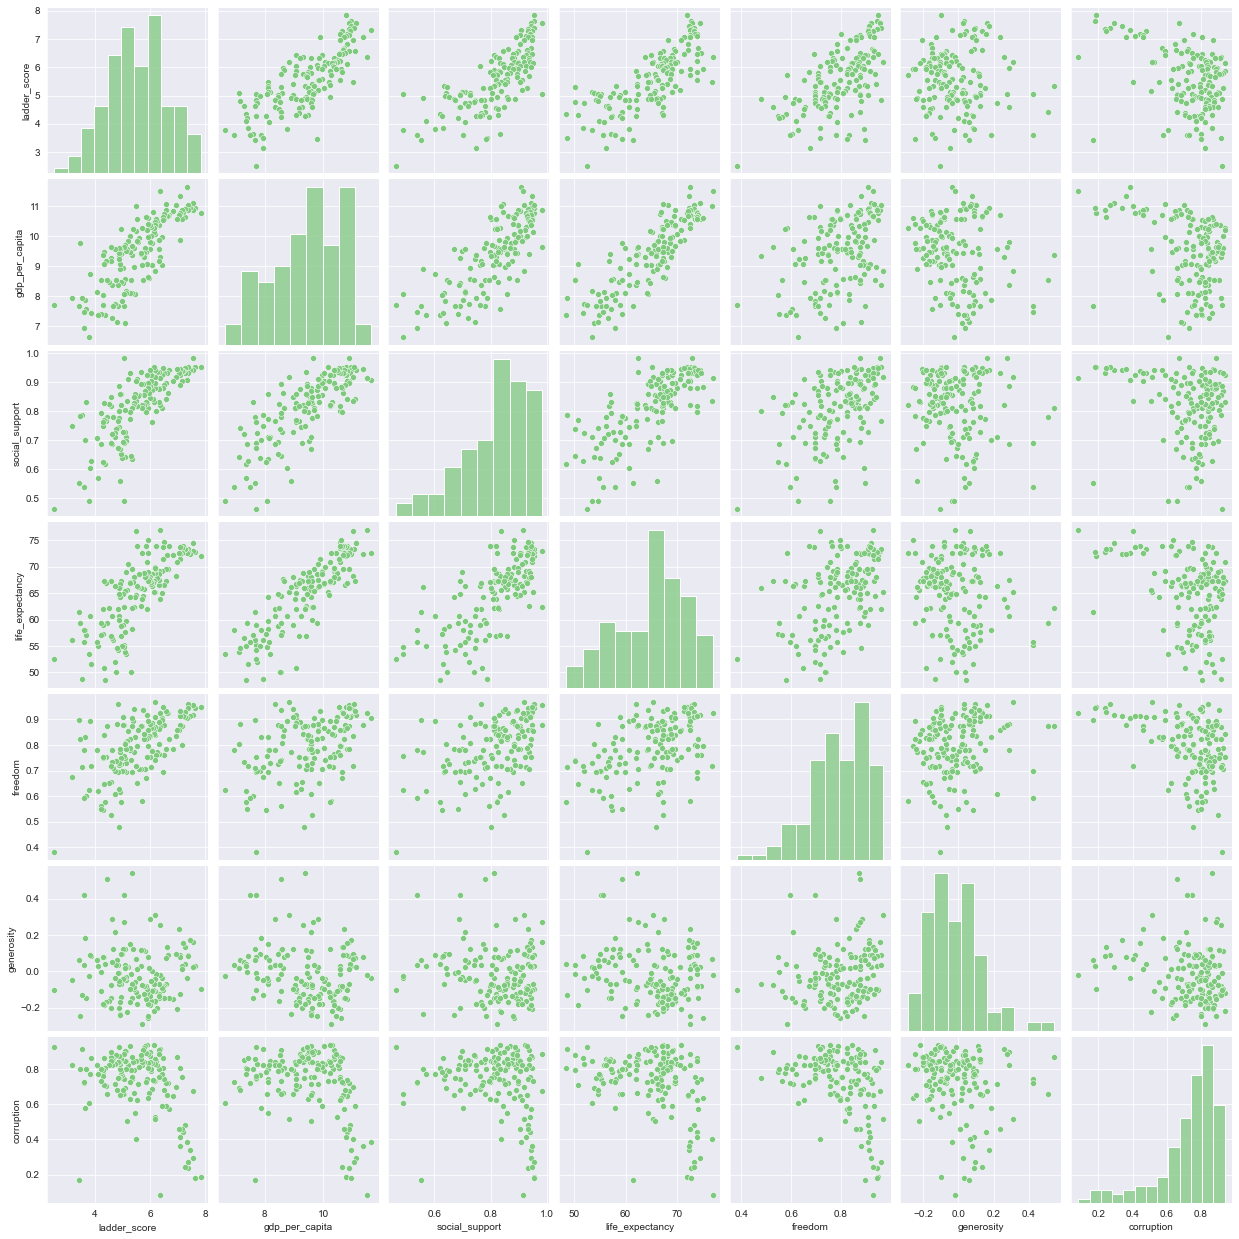

In [38]:
sns.set_style('darkgrid')
sns.set_palette('Accent')
sns.pairplot(rf_whr_2021, palette = 'Accent')

<b>2021 top 10 and bottom 10 Happiest Countries</b>
<li>Finland has the highest happiness score in 2021</li>
<li>Afghanistan has the lowest happiness score in 2021</li>

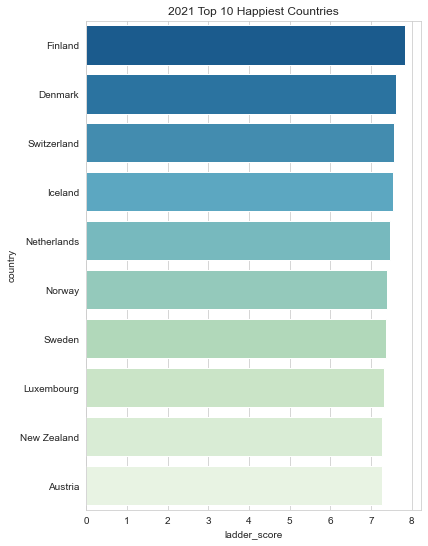

In [39]:
#Visual of the 2021 top 10 Happiest Countries

top_10 = rf_whr_2021.head(10)
bot_10 = rf_whr_2021.tail(10)

#Seaborn Visualization 
sns.set_style('darkgrid')
plt.figure(figsize=(6,9))
sns.set_palette('GnBu_r')
sns.set_style('whitegrid')

_=sns.barplot(y = top_10['country'], x = top_10['ladder_score'], palette = 'GnBu_r')

_=plt.title('2021 Top 10 Happiest Countries')

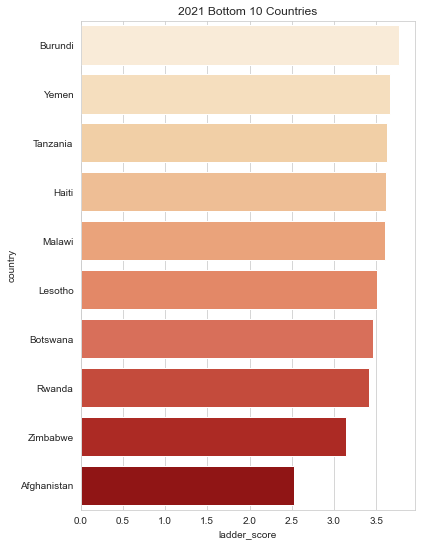

In [40]:
#Visual of the 2021 bottom 10 Happiest Countries
bot_10 = rf_whr_2021.tail(10)

#Seaborn Visualization 
sns.set_style('darkgrid')
plt.figure(figsize=(6,9))
sns.set_palette('OrRd')
sns.set_style('whitegrid')

_=sns.barplot(y = bot_10['country'], x = bot_10['ladder_score'], palette = 'OrRd')

_=plt.title('2021 Bottom 10 Countries')

In [41]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = rf_whr_2021['country'],
           locationmode = 'country names',
           z = rf_whr_2021['ladder_score'], 
           colorbar = {'title':'Happiness Score'})
layout = dict(title = 'Global Happiness Score', 
             geo = dict(showframe = False, 
                       projection = {'type': 'natural earth'}))
choromap = go.Figure(data = [data], layout=layout)
iplot(choromap)

<b>Analysis of Histogram of the 2021 World Happiness Report regions</b>


The 2021 regions and ladder score boxplot displays the five number summary (min, Q1, Q2, median, Q3, & max) & any data outliers. From the boxplot below, Western Europe and North America and ANZ regions have the highest ladder score (happiness scores) distribution. Sub-Saharan Africa and South Asia have the lowest ladder scores distribution. 

Additional observation is that there is a large difference between hi- and low-level of happiness in regions like South Asia, Sub-Saharan Africa, Middle East and North Africa. 



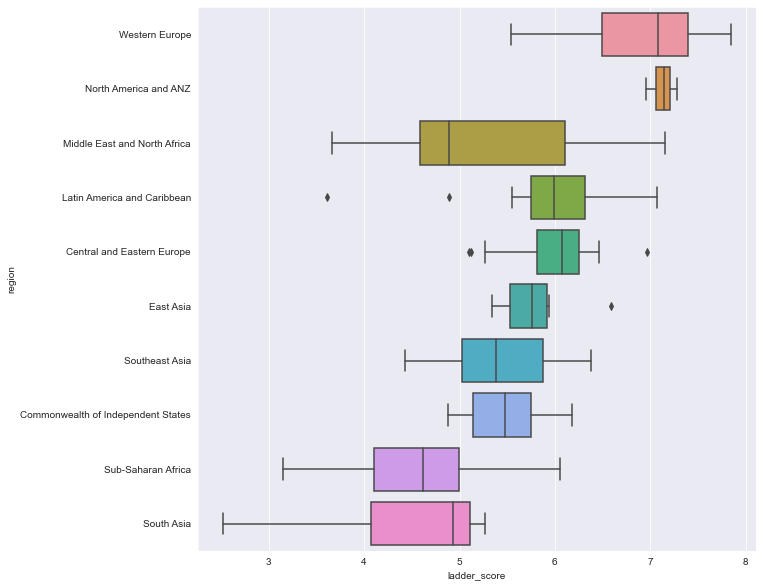

In [1004]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,10))
_=sns.boxplot(y='region', x='ladder_score', data=rf_whr_2021, orient="h", ax=ax)

<b>Correlations between features</b>

There is a strong correlation between the following factors:
<li> ladder score & GDP per capita</li>
<li> social support & GDP per capita</li>
<li> life expectancy & GDP per capita</li>
<li> life expectancy and social support</li>
    
It is interesting to see that there is a very weak correlation between the ladder score and generosity.

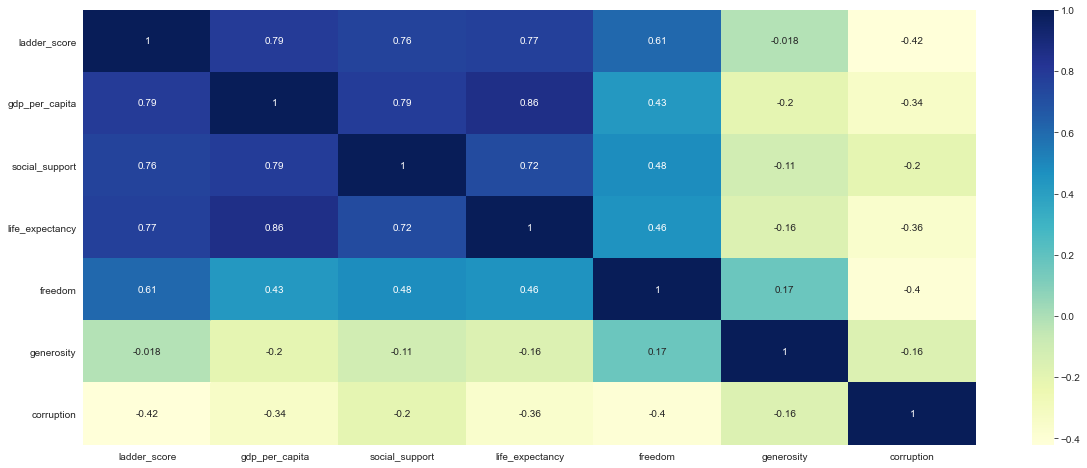

In [1005]:

fig_dims = (20,8)
fig, ax = plt.subplots(figsize = fig_dims)
_=sns.heatmap(rf_whr_2021[['ladder_score', 'gdp_per_capita','social_support', 'life_expectancy',
       'freedom', 'generosity','corruption'] ].corr(), annot = True, cmap="YlGnBu" )

In [1006]:
#Get from slide

In [1007]:
# Create a list of columns names to use for scatter plot
plot_cols = list(rf_whr_2021.columns)

# Remove columns not suitable for correlation with happiness scores in a scatterplot
plot_cols.remove('ladder_score')
plot_cols.remove('country')
plot_cols.remove('region')
plot_cols.remove('year')
#plot_cols = plot_cols[1:]
plot_cols


['gdp_per_capita',
 'social_support',
 'life_expectancy',
 'freedom',
 'generosity',
 'corruption']

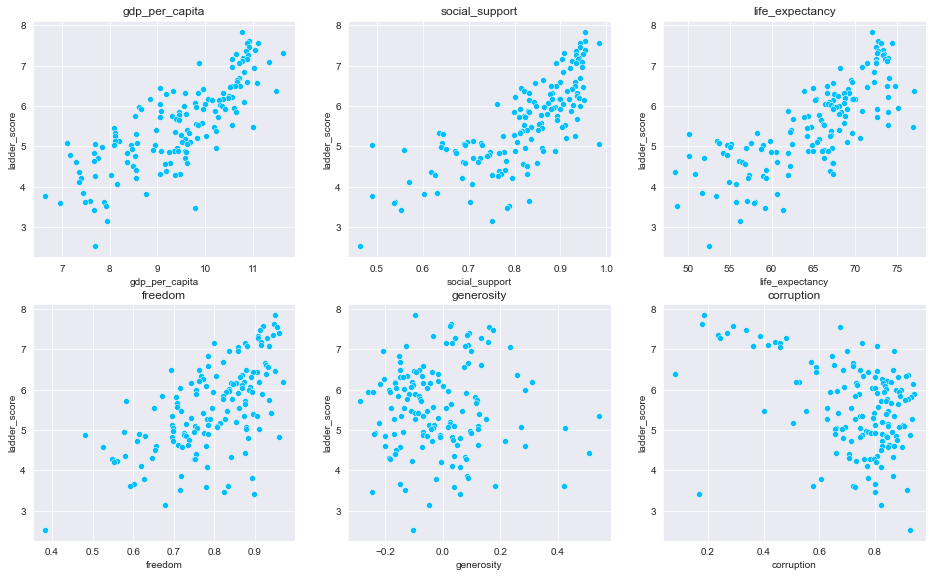

In [1008]:
fig = plt.figure(figsize=[16,20])

for i in list(range(len(plot_cols))):
    plt.subplot(4,3,i+1)
    sns.scatterplot(x= plot_cols[i], y='ladder_score', data=rf_whr_2021, color='deepskyblue')
    plt.title(plot_cols[i])
plt.show()

<b>Distribution of all numeric data of 2021 World Happiness Report</b>

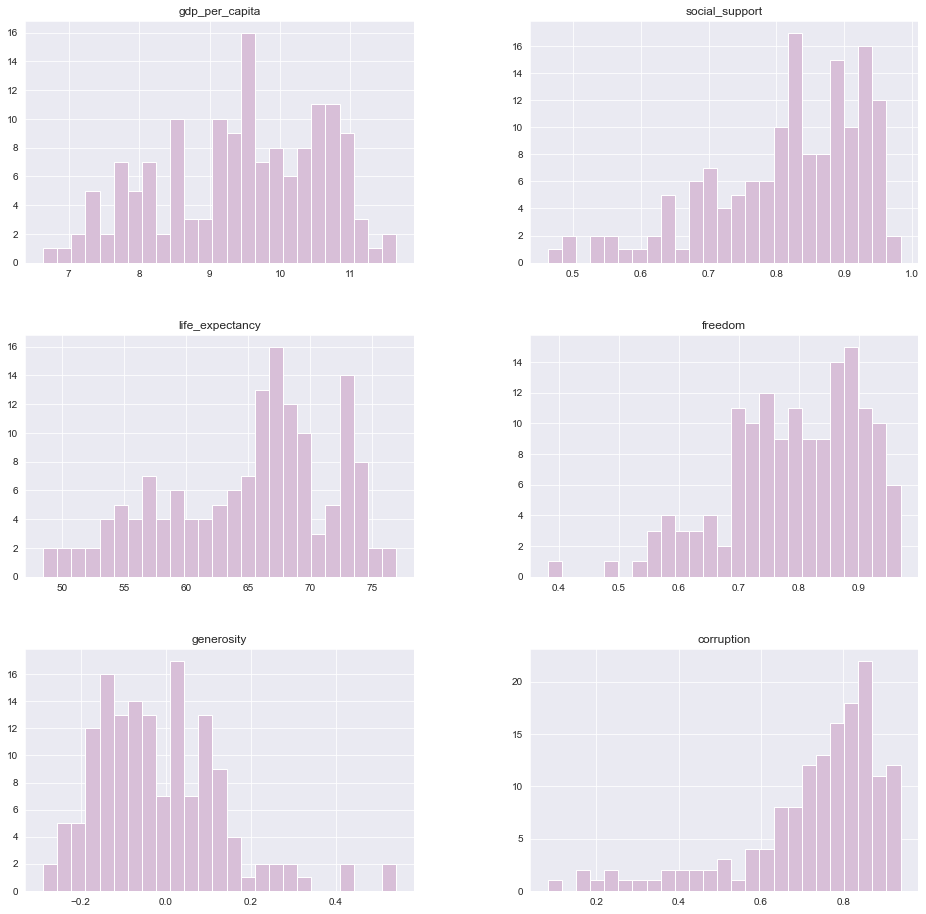

In [1009]:
# Distribution of all numeric data of 2021 World Happiness Report 
plt.rcParams['figure.figsize'] = (15, 15)
df1 = rf_whr_2021[['gdp_per_capita', 'social_support', 'life_expectancy',
       'freedom', 'generosity', 'corruption']]
h = df1.hist(bins = 25, figsize = (16,16),
             xlabelsize = '10', ylabelsize = '10', color = 'thistle')


<b>Distribution of all numeric data features to each regions in the World Happiness Report</b>

<b> Analysis</b>
    
Displaying the mean scores of each facto of each region from 2008 to 2021 World Happiness Report data. North America & ANZ and Western Europe consistently score the highest in Ladder Score, GDP per Capita, Social Support, Life Expectancy, Freedom and Generosity. South Asia and Sub-Saharan Africa score the lowesr in Ladder Score, GDP per Capita, Social Support, and Life Expectancy. Centeral and Eastern Europe scored the highest in corruption.

In [1010]:
#Using the 2006 to 2021 World Happiness Report data
df_region= whr.groupby('region').mean().round(2)

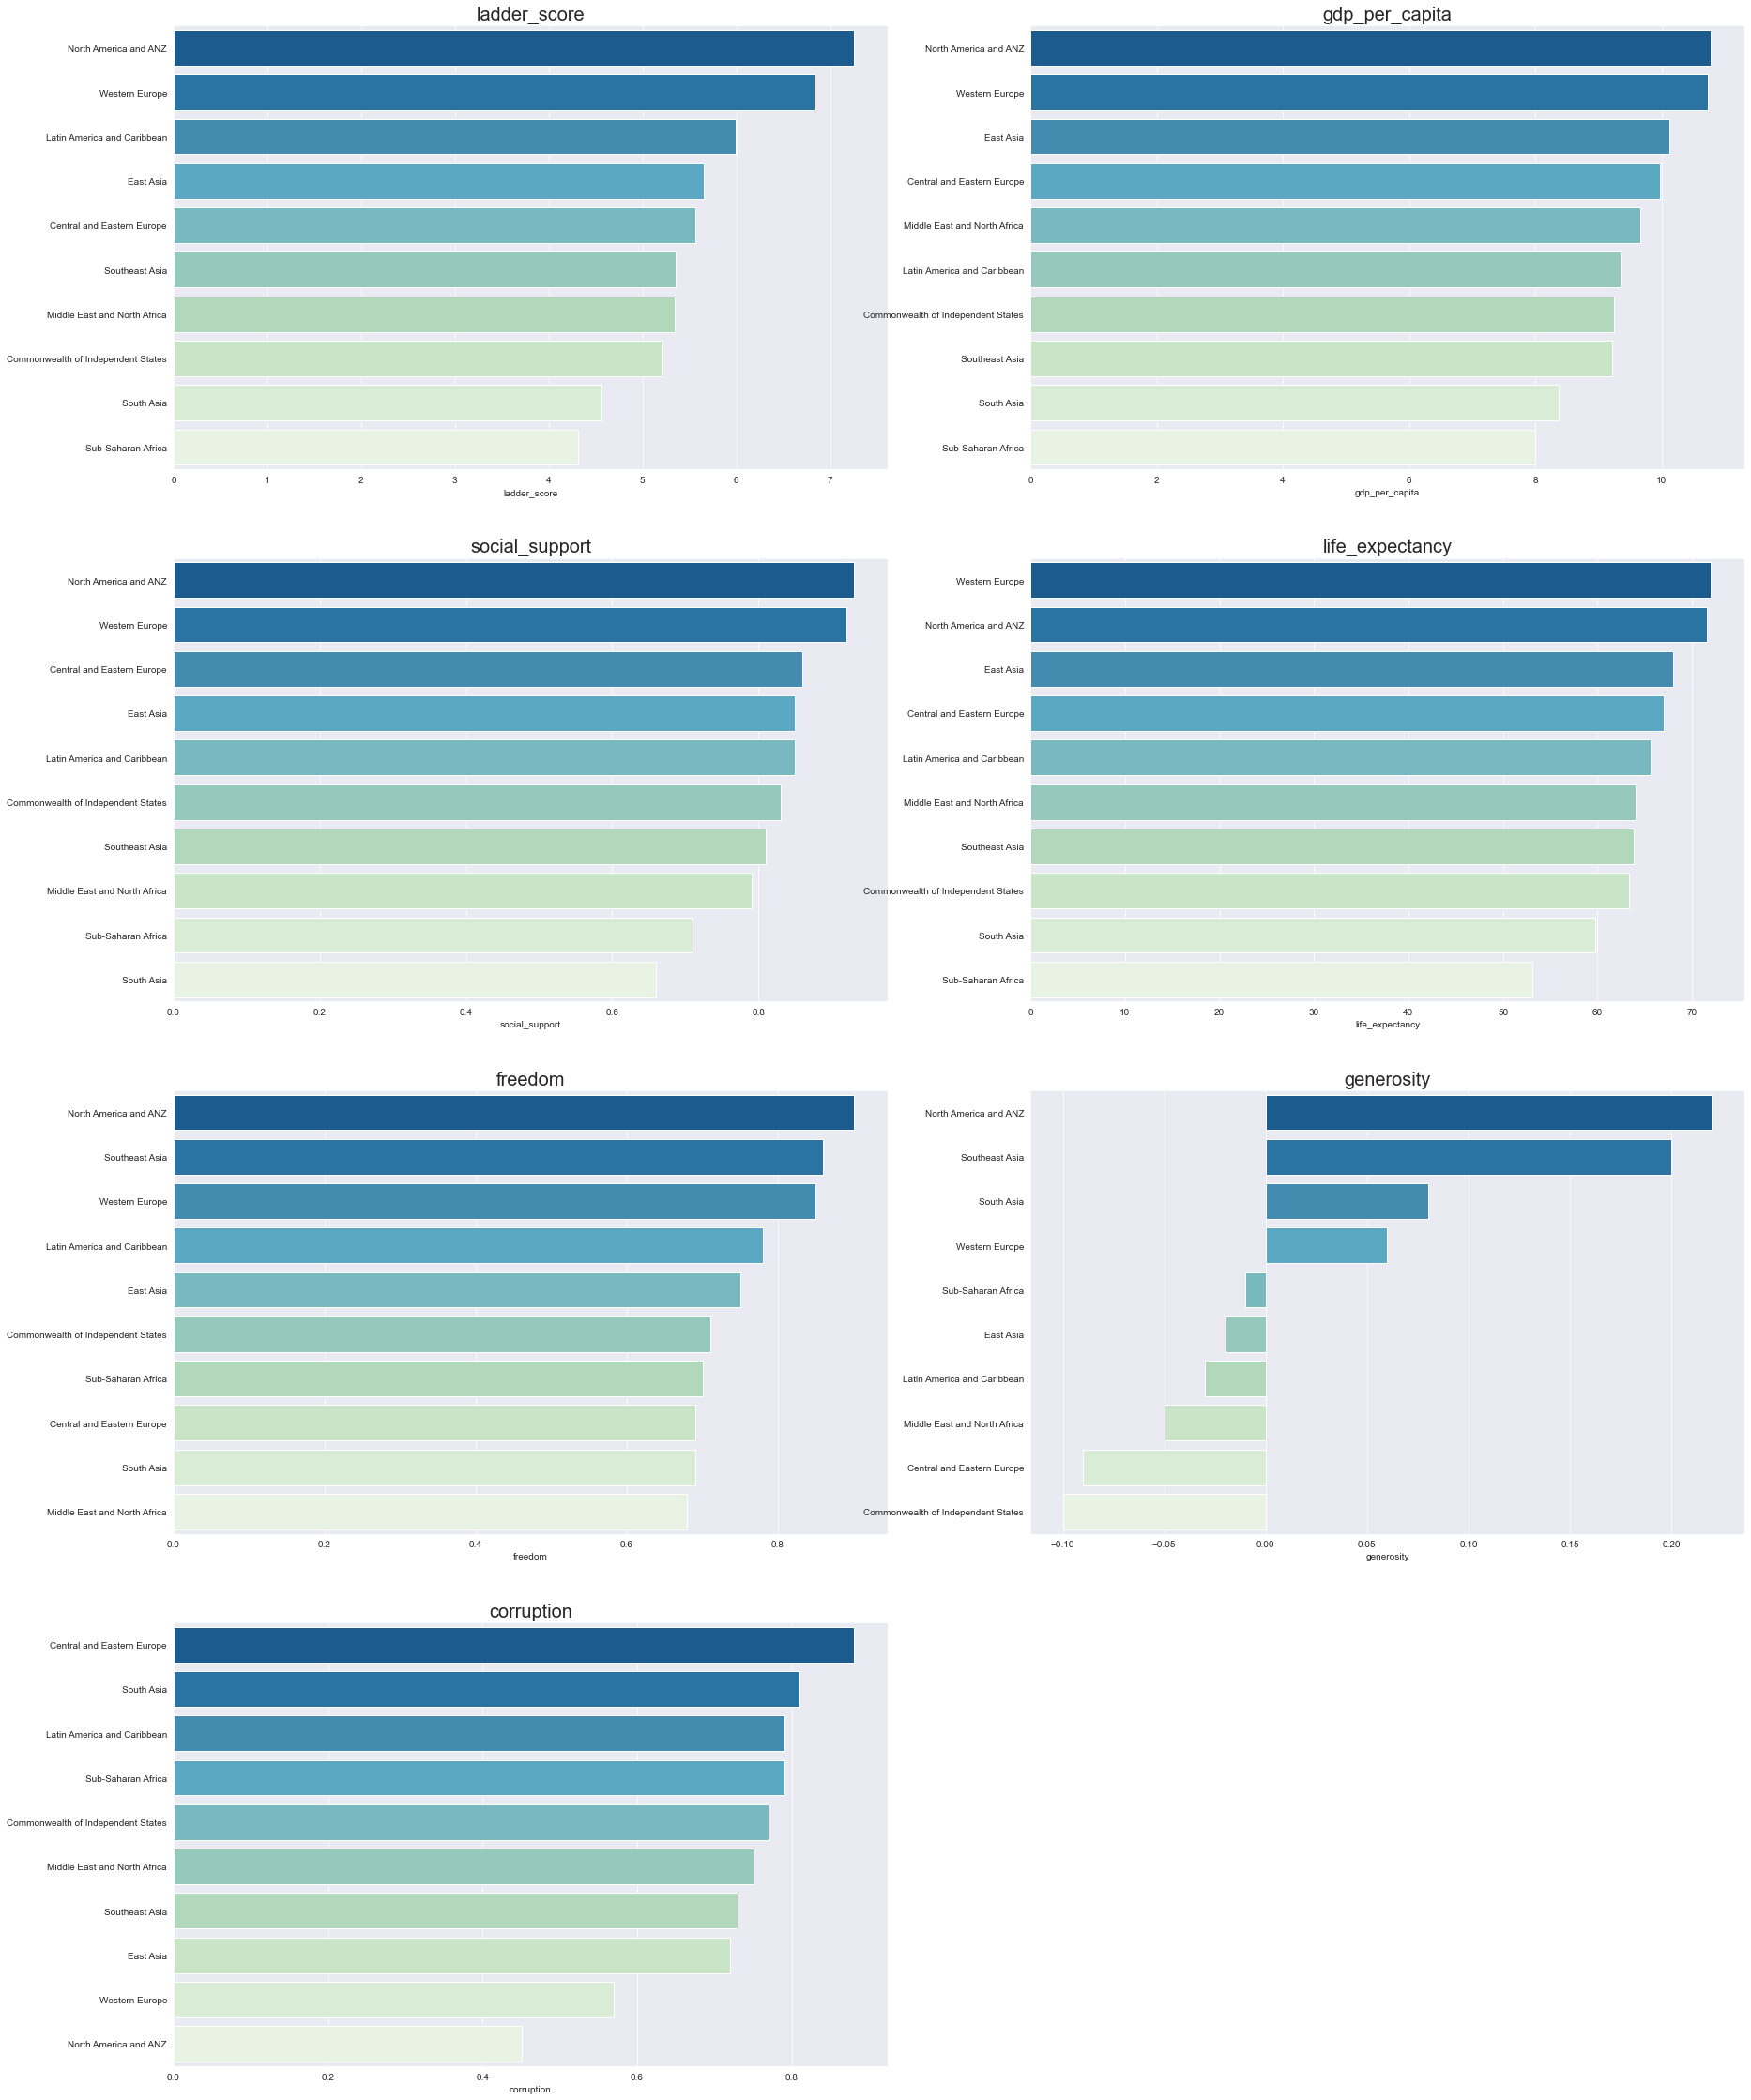

In [1011]:
#Distribution of all numeric data of regions in the World Happiness Report 
sns.set_style('darkgrid')
plt.figure(figsize= (30, 40))

l= [ 'ladder_score', 'gdp_per_capita', 'social_support', 'life_expectancy',
       'freedom', 'generosity', 'corruption']

n= 1
for i in l:
    plt.subplot(4, 2, n)
    ax= sns.barplot(x= i, y= df_region.index, data= df_region, 
                order= df_region.sort_values(i, ascending= False).index, palette= 'GnBu_r')
    plt.title(i, fontsize= 20)
    ax.set_ylabel('')
    n+= 1


The graphs below display the tends of the Ladder Score, GPD per Capita, Social Support, Life Expectancy, Freedom,  Generosity, and Corruption of time. 

Future Work: Looking at an individual country trends over time and conduct research on the countries response based on the economic, political, and social situations.

In [1012]:
#Creating df to graph the region 
region = whr[(whr['region'] == 'Western Europe') | (whr['region'] == 'North America and ANZ') | (whr['region'] == 'Middle East and North Africa') | (whr['region'] == 'Latin America and Caribbean') | (whr['region'] == 'Central and Eastern Europe') | (whr['region'] == 'East Asia') | (whr['region'] == 'Southeast Asia') | (whr['region'] == 'Commonwealth of Independent States')| (whr['region'] == 'Sub-Saharan Africa') | (whr['region'] == 'South Asia') ]
region = region.astype({'year' : int})

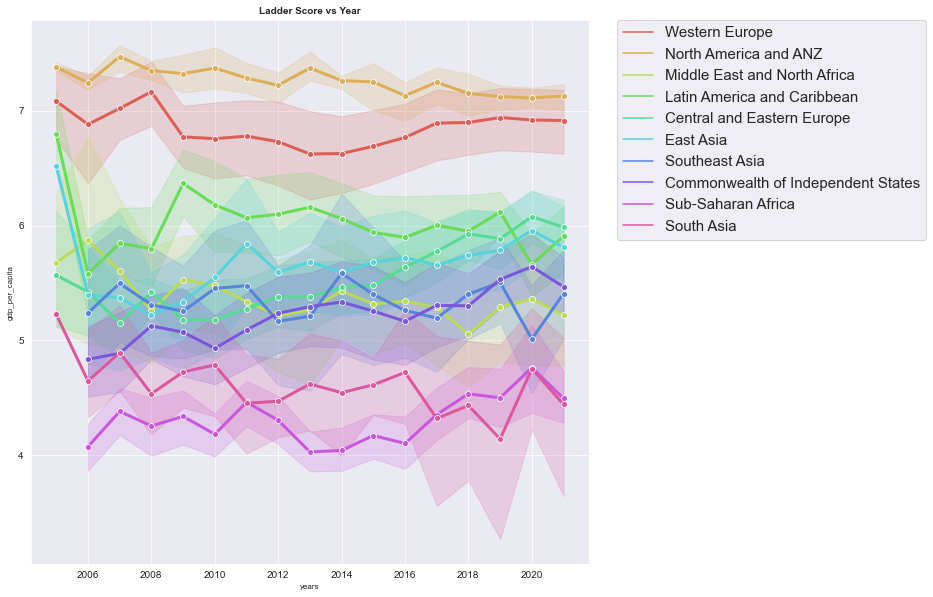

In [1013]:
#Distribution of all Ladder Score information for each region over the years  
#The data is passing through the entire dataset, which is aggregate over repeated values (each year) to show the mean and 95% confidence interval 
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.lineplot(x='year', y='ladder_score', data=region, marker='o', hue='region', palette='hls', linewidth=3)
plt.title('Ladder Score vs Year', fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.xlabel('years', fontsize=8)
plt.ylabel('gdp_per_capita', fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size':15})

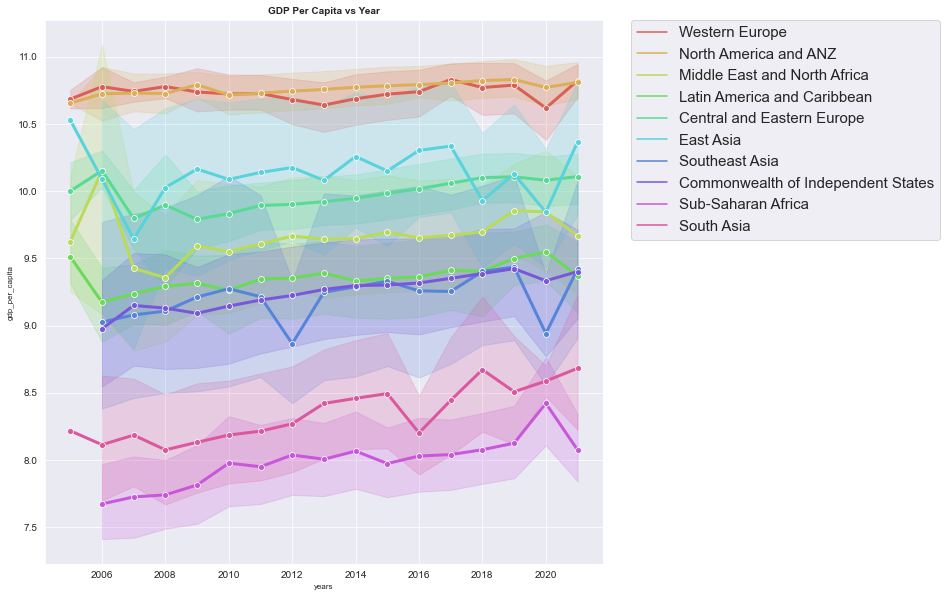

In [1014]:
#Distribution of all GDP Per Capita information for each region over the years 
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.lineplot(x='year', y='gdp_per_capita', data=region, marker='o', hue='region', palette='hls', linewidth=3)
plt.title('GDP Per Capita vs Year', fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.xlabel('years', fontsize=8)
plt.ylabel('gdp_per_capita', fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size':15})

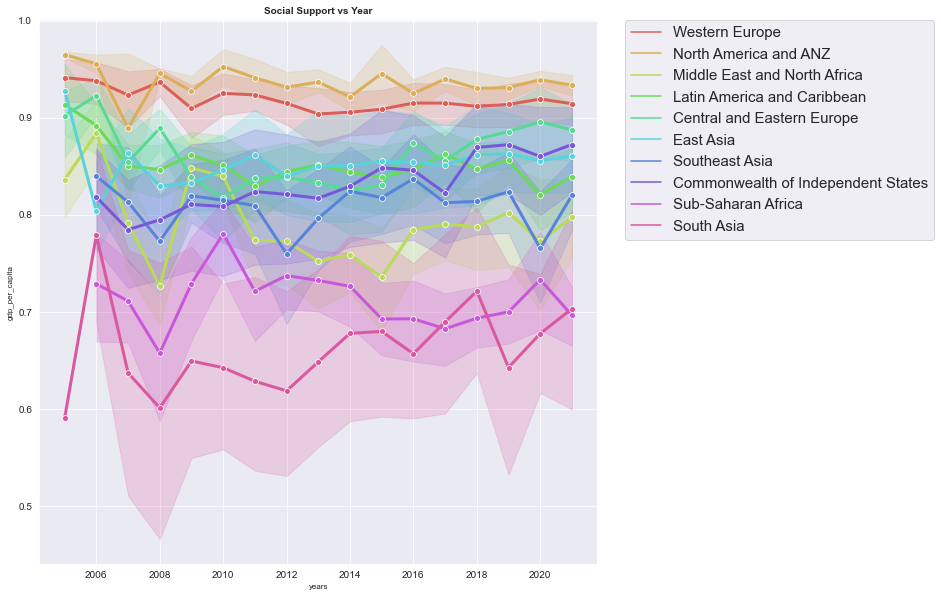

In [1015]:
#Distribution of all Social Support information for each region over the years 
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.lineplot(x='year', y='social_support', data=region, marker='o', hue='region', palette='hls', linewidth=3)
plt.title('Social Support vs Year', fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.xlabel('years', fontsize=8)
plt.ylabel('gdp_per_capita', fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size':15})

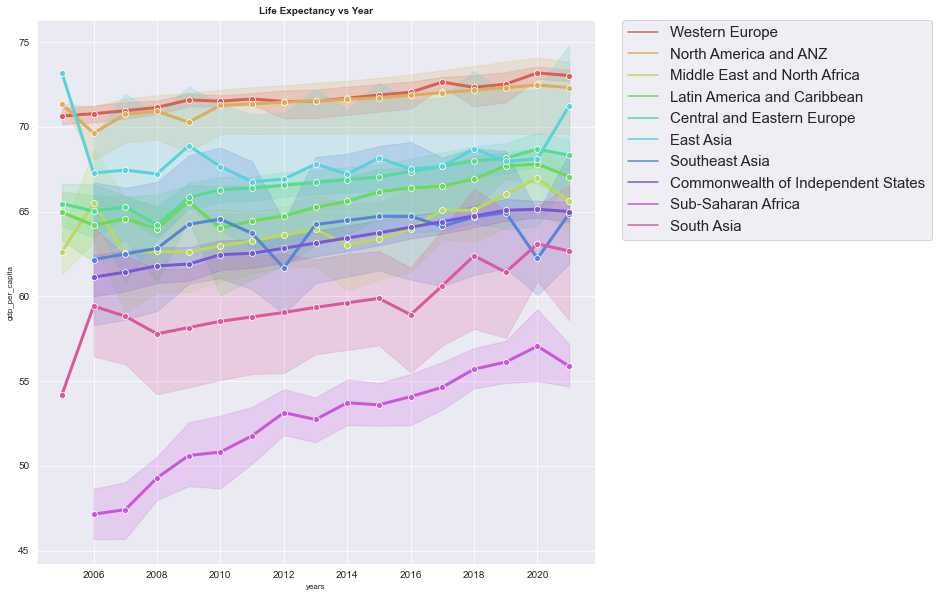

In [1016]:
#Distribution of all Life Expectancy information for each region over the years 
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.lineplot(x='year', y='life_expectancy', data=region, marker='o', hue='region', palette='hls', linewidth=3)
plt.title('Life Expectancy vs Year', fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.xlabel('years', fontsize=8)
plt.ylabel('gdp_per_capita', fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size':15})

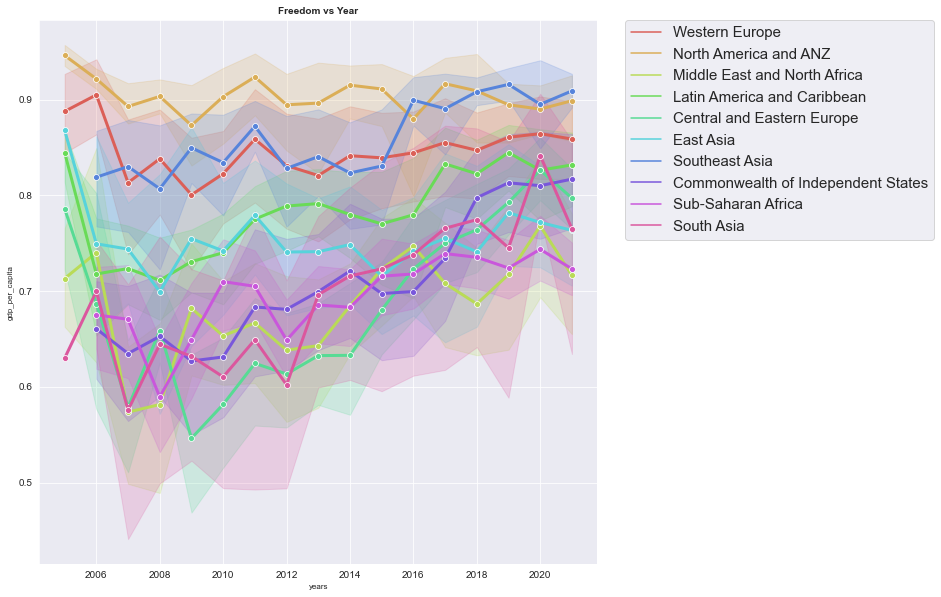

In [1017]:
#Distribution of all Life Freedom for each region over the years 
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.lineplot(x='year', y='freedom', data=region, marker='o', hue='region', palette='hls', linewidth=3)
plt.title('Freedom vs Year', fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.xlabel('years', fontsize=8)
plt.ylabel('gdp_per_capita', fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size':15})

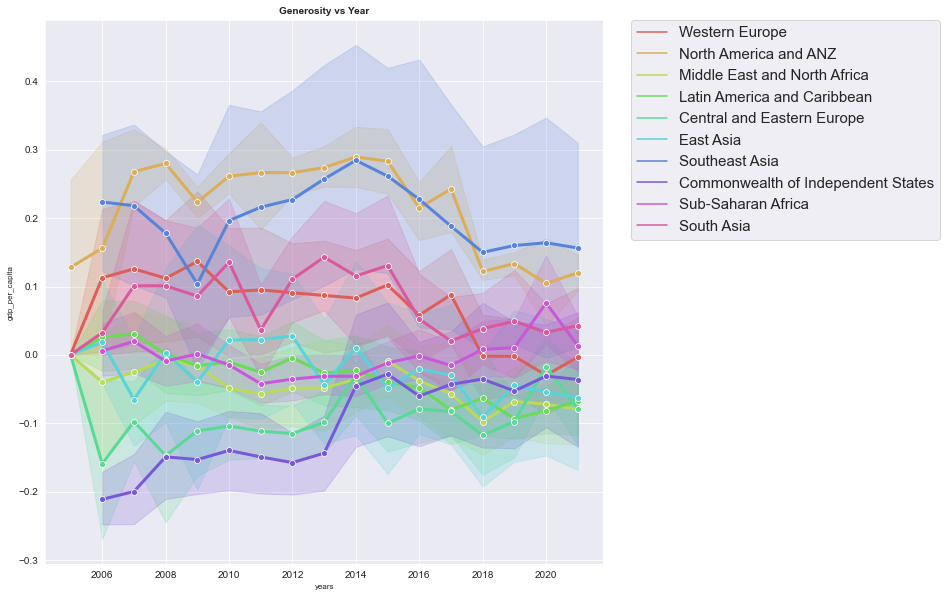

In [1018]:

plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.lineplot(x='year', y='generosity', data=region, marker='o', hue='region', palette='hls', linewidth=3)
plt.title('Generosity vs Year', fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.xlabel('years', fontsize=8)
plt.ylabel('gdp_per_capita', fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size':15})

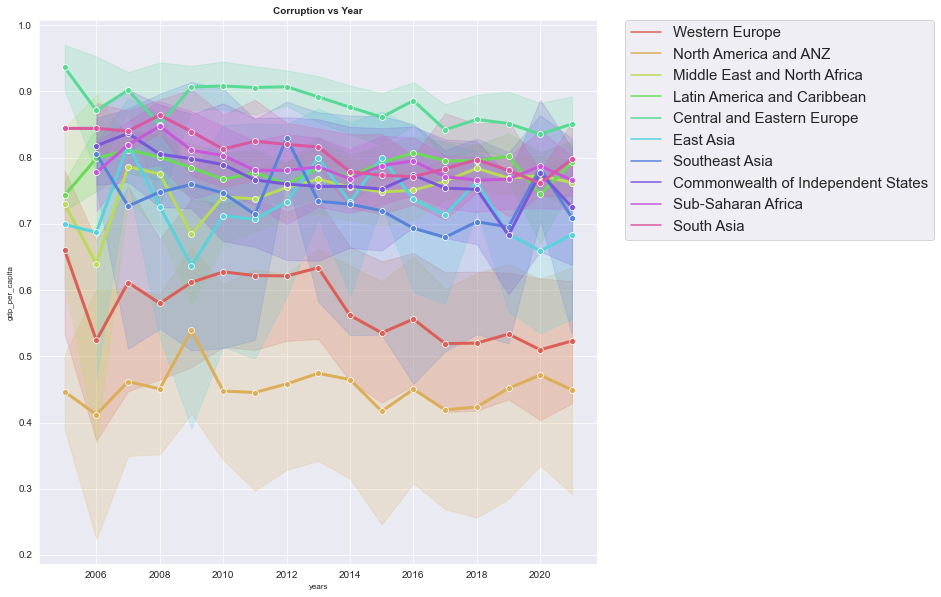

In [1019]:
#Distribution of all Corruption information for each region over the years 
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.lineplot(x='year', y='corruption', data=region, marker='o', hue='region', palette='hls', linewidth=3)
plt.title('Corruption vs Year', fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.xlabel('years', fontsize=8)
plt.ylabel('gdp_per_capita', fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size':15})

### Models

### Linear Regression

Overall, Linear Regression was the best model preformance for the current data set

Using Linear Regression to predict the ladder score (Happiness scores) using the World Happiness Report

In [1020]:
x= whr[['gdp_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']]
y= whr['ladder_score']

In [1021]:
from sklearn import model_selection, linear_model, metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Building the linear regression model using data from the past World Happiness Report from 2006 to 2020


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state=10)
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
y_predict= lr.predict(x_test)
predit = lr.predict(x_train)

print("Train score (R-squared):")
print(lr.score(x_train, y_train))

print('')

print("Test score (R-squared):")
print(lr.score(x_test, y_test))

print('')
print('Intercept : ')
print(lr.intercept_)

print('Coefficient List : ')
print(lr.coef_)


Train score (R-squared):
0.7453870516800958

Test score (R-squared):
0.7281182540005529

Intercept : 
-2.084904520680115
Coefficient List : 
[ 0.36530956  2.3575847   0.02813223  1.17765283  0.55255964 -0.6068844 ]


The model is intelligent 

In [1022]:
# mean squared error vs. R squared:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'MSE against the test data set is {mse}')
print(f'R squared against the test data set is {r2}')

MSE against the test data set is 0.33240484024947275
R squared against the test data set is 0.7281182540005529


R-square is .72 and the mean square error is .35. 

In [1023]:
result_lnr_reg=pd.DataFrame({
    'Actual':y_test,
    'Predict':y_predict
})
result_lnr_reg.head(4)

Actual   Predict
1028   4.640  3.874297
886    5.882  5.967503
4      3.783  3.712531
661    6.325  5.533717

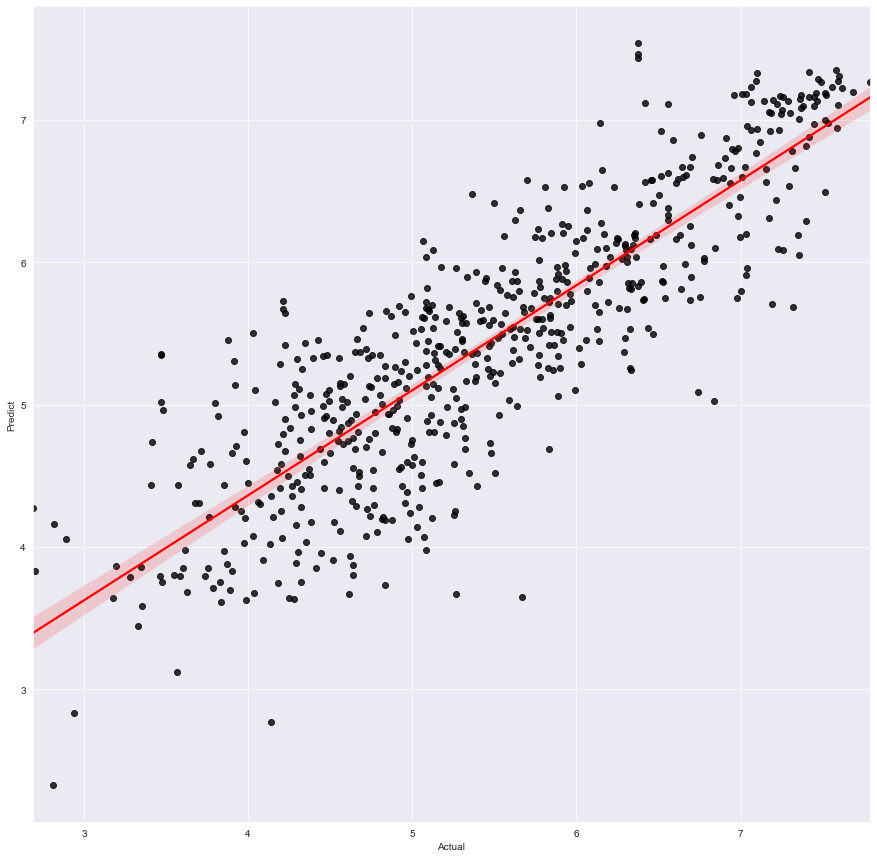

In [1024]:
_=sns.regplot(x='Actual',y='Predict',data=result_lnr_reg,
             scatter_kws={"color": "black"}, line_kws={"color": "red"})

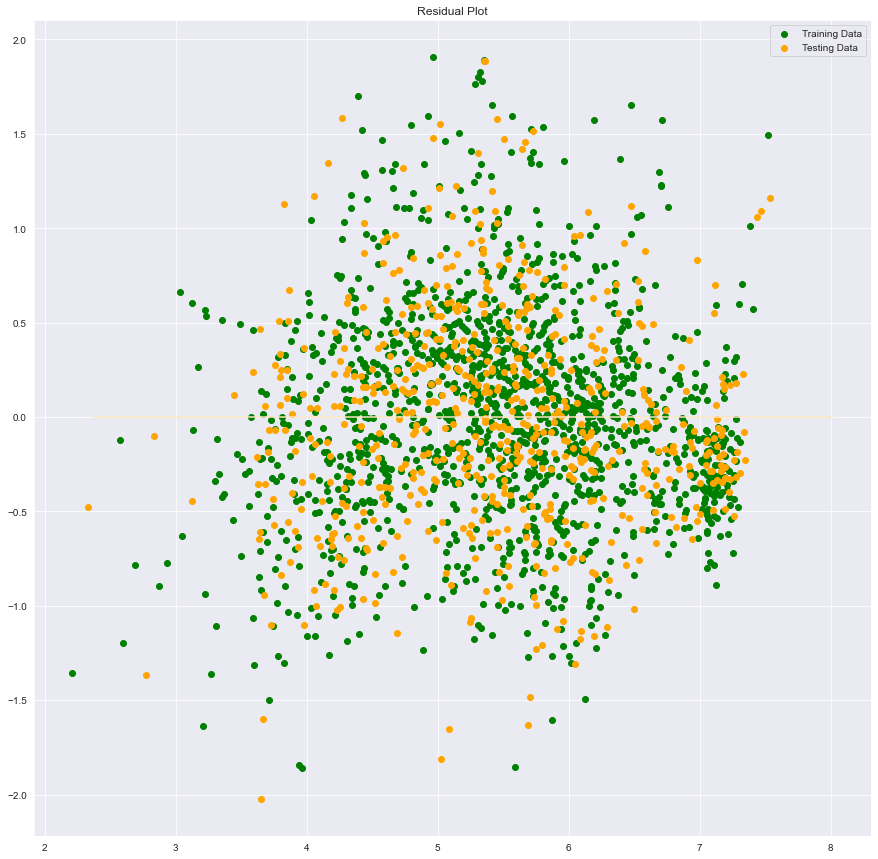

In [1025]:
# Plot the Residuals for the Training and Testing data

 
plt.scatter(predit, predit - y_train, c='green', label='Training Data')
plt.scatter(y_predict, y_predict - y_test, c='orange', label='Testing Data')
plt.title('Residual Analysis')

plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title('Residual Plot')
plt.show()

If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Using Linear Regression to predict the 2021 ladder score (Happiness scores) from the 2021 World Happiness Report

In [668]:
x= rf_whr_2021[['gdp_per_capita', 'social_support', 'life_expectancy',
       'freedom', 'generosity', 'corruption']]
y= rf_whr_2021['ladder_score']

In [669]:
from sklearn import model_selection, linear_model, metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Building the linear regression model using data from the 2021 Happiness Report

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state=10)
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
y_predict= lr.predict(x_test)

predit=lr.predict(x_train)

print("Train score (R-squared):")
print(lr.score(x_train, y_train))

print('')

print("Test score (R-squared):")
print(lr.score(x_test, y_test))

print('')
print('Intercept : ')
print(lr.intercept_)

print('Coefficient List : ')
print(lr.coef_)




Train score (R-squared):
0.7957517322440812

Test score (R-squared):
0.6026294946628507

Intercept : 
-2.1108070464862
Coefficient List : 
[ 0.14653865  4.01362215  0.02921706  2.00352012  0.12453666 -0.68769936]


The model is intelligent

In [670]:
# mean squared error vs. R squared:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'MSE against the test data set is {mse}')
print(f'R squared against the test data set is {r2}')

MSE against the test data set is 0.3949661586778067
R squared against the test data set is 0.6026294946628507


The R-square is .62 and the mean square error is .39. 

In [671]:
result_lnr_reg=pd.DataFrame({
    'Actual':y_test,
    'Predict':y_predict
})
result_lnr_reg.head(4)

Actual   Predict
81    5.345  5.555264
132   4.275  4.800395
10    7.183  6.950225
87    5.266  5.977032

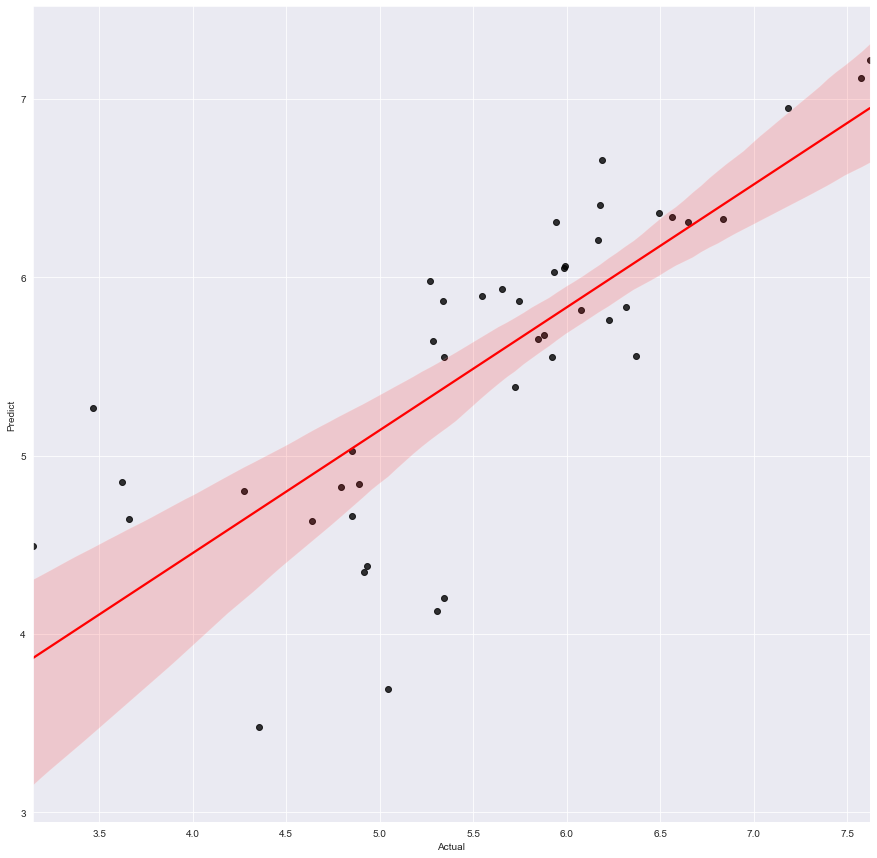

In [672]:
_=sns.regplot(x='Actual',y='Predict',data=result_lnr_reg,
             scatter_kws={"color": "black"}, line_kws={"color": "red"})

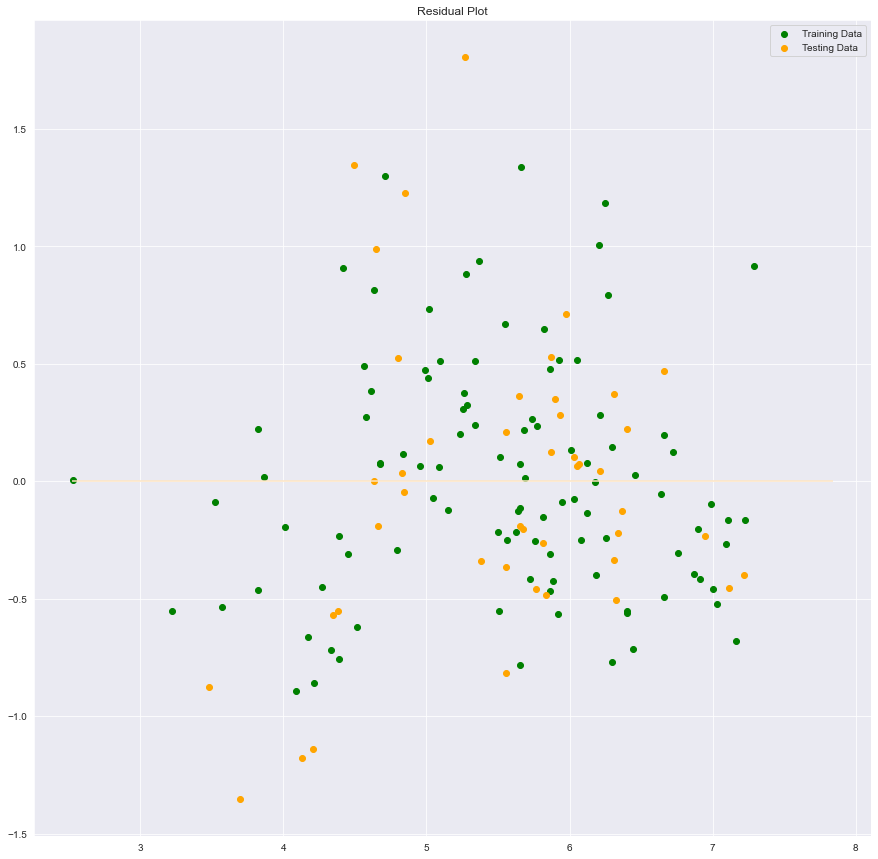

In [673]:
# Plot the Residuals for the Training and Testing data
 
plt.scatter(predit, predit - y_train, c='green', label='Training Data')
plt.scatter(y_predict, y_predict - y_test, c="orange", label='Testing Data')

plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title('Residual Plot')
plt.show()

If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Potential improvements to the models is to scale the data.

### RandomForest

Using Random Forest Classifier to predict the ladder score (Happiness scores) from the World Happiness Report

(Using the whole World Happiness Report to create more data)

In [1060]:
data = whr.loc[whr['ladder_score'] != 0]

# Set the rounded features as integers
data['ladder_score'] = data['ladder_score'].round()
data['ladder_score'] = data['ladder_score'].astype('int64')

data['gdp_per_capita'] = data['gdp_per_capita'].round()
data['gdp_per_capita'] = data['gdp_per_capita'].astype('int64')

data['social_support'] = data['social_support'].round()
data['social_support'] = data['social_support'].astype('int64')

data['life_expectancy'] = data['life_expectancy'].round()
data['life_expectancy'] = data['life_expectancy'].astype('int64')

data['freedom'] = data['freedom'].round()
data['freedom'] = data['freedom'].astype('int64')

data['generosity'] = data['generosity'].round()
data['generosity'] = data['generosity'].astype('int64')

data['corruption'] = data['corruption'].round()
data['corruption'] = data['corruption'].astype('int64')

ns=data.drop(['country', 'year', 'region'], axis=1)

In [1061]:
# Random forest for feature importance on a classification problem
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

#Declaring feature data and target data
X = ns.drop(['ladder_score'], axis=1)
y = ns['ladder_score']


In [1062]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1063]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1064]:
rf = RandomForestClassifier(n_estimators=15, random_state = 0)
rf.fit(X_train,y_train)

rf_score_train = rf.score(X_train,y_train)
print("Training score: ", rf_score_train)

rf_score_test = rf.score(X_test, y_test)
print("Testing score: ", rf_score_test)
 #prediction
predictions=rf.predict(X_test)


Training score:  0.632300357568534
Testing score:  0.5738095238095238


In [1065]:
#Confusion Matrix
array_1 = (metrics.confusion_matrix(y_true=y_test, y_pred = predictions))
print(array)

[[ 0  6  4  0  0  0]
 [ 5 42 27  5  0  0]
 [ 1 24 73 33  1  0]
 [ 0  1 26 69  4  0]
 [ 0  0  2 18 40  1]
 [ 0  0  0  1  5  2]]


<AxesSubplot:>

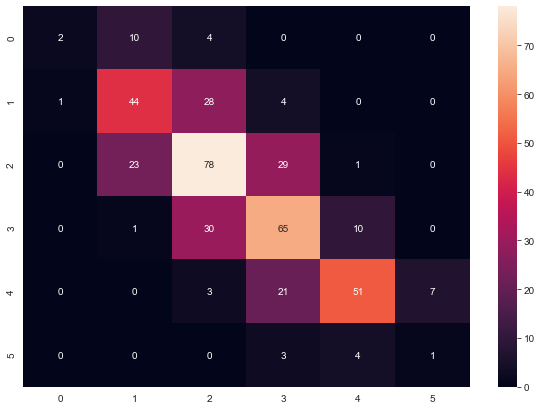

In [1066]:
cm_1 = pd.DataFrame(array_1)
plt.figure(figsize = (10,7))
sns.heatmap(cm_1, annot=True)

In [1067]:
# Accuracy
print('Accuracy Score (TP+TN)/Total %r:'%metrics.accuracy_score(predictions, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Accuracy Score (TP+TN)/Total 0.5738095238095238:
Mean Absolute Error: 0.4642857142857143
Mean Squared Error: 0.5404761904761904
Root Mean Squared Error: 0.735170858016142


The model has a high RSME score and MSE. This resulted in a 57% accuracy. 

In [1068]:
#metrics
print(metrics.classification_report(y_true = y_test, y_pred =predictions))

              precision    recall  f1-score   support

           3       0.67      0.12      0.21        16
           4       0.56      0.57      0.57        77
           5       0.55      0.60      0.57       131
           6       0.53      0.61      0.57       106
           7       0.77      0.62      0.69        82
           8       0.12      0.12      0.12         8

    accuracy                           0.57       420
   macro avg       0.53      0.44      0.46       420
weighted avg       0.59      0.57      0.57       420



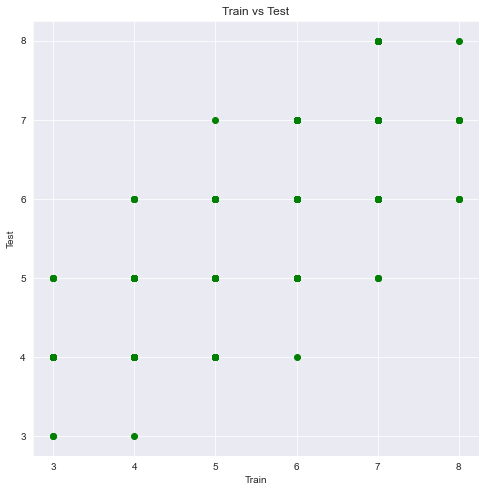

In [1069]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions, c='green')
plt.xlabel("Train")
plt.ylabel("Test")
plt.title("Train vs Test")
plt.show()

Model Analysis: The model performed with 57% accuracy on the data set. The model performed with 63% accuracy on the training data. The model did make predictions for all classes. The f1-score is low for the rest 8 (12%), which could be due to the poor recall of those classes.

Using Random Forest Classifier to predict the ladder score (Happiness scores) from the past World Happiness Report

In [821]:
data_1 = rf_past_whr.loc[rf_past_whr['ladder_score'] != 0]

# Set the rounded features as integers
data_1['ladder_score'] = data_1['ladder_score'].round()
data_1['ladder_score'] = data_1['ladder_score'].astype('int64')

data_1['gdp_per_capita'] = data_1['gdp_per_capita'].round()
data_1['gdp_per_capita'] = data_1['gdp_per_capita'].astype('int64')

data_1['social_support'] = data_1['social_support'].round()
data_1['social_support'] = data_1['social_support'].astype('int64')

data_1['life_expectancy'] = data_1['life_expectancy'].round()
data_1['life_expectancy'] = data_1['life_expectancy'].astype('int64')

data_1['freedom'] = data_1['freedom'].round()
data_1['freedom'] = data_1['freedom'].astype('int64')

data_1['generosity'] = data_1['generosity'].round()
data_1['generosity'] = data_1['generosity'].astype('int64')

data_1['corruption'] = data_1['corruption'].round()
data_1['corruption'] = data_1['corruption'].astype('int64')

ns=data_1.drop(['country', 'year', 'region'], axis=1)

In [858]:
# Random forest for feature importance on a classification problem
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

#Declaring feature data and target data
X = ns.drop(['ladder_score'], axis=1)
y = ns['ladder_score']


In [859]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [860]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [861]:
rf = RandomForestClassifier(n_estimators=15, random_state = 0)
rf.fit(X_train,y_train)

rf_score_train = rf.score(X_train,y_train)
print("Training score: ", rf_score_train)

rf_score_test = rf.score(X_test, y_test)
print("Testing score: ", rf_score_test)
 #prediction
predictions=rf.predict(X_test)


Training score:  0.6555484284797948
Testing score:  0.5076923076923077


In [862]:
predictions[:5]

array([5, 6, 6, 6, 6])

In [863]:
#Confusion Matrix
array_1 = (metrics.confusion_matrix(y_true=y_test, y_pred = predictions))
print(array)

[[ 0  6  4  0  0  0]
 [ 5 42 27  5  0  0]
 [ 1 24 73 33  1  0]
 [ 0  1 26 69  4  0]
 [ 0  0  2 18 40  1]
 [ 0  0  0  1  5  2]]


<AxesSubplot:>

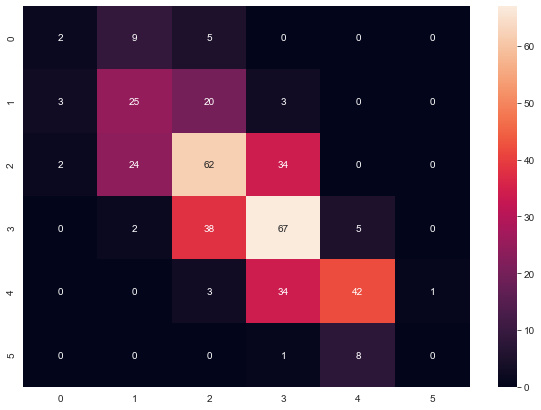

In [864]:
cm_1 = pd.DataFrame(array_1)
plt.figure(figsize = (10,7))
sns.heatmap(cm_1, annot=True)

In [865]:
# Accuracy
print('Accuracy Score (TP+TN)/Total %r:'%metrics.accuracy_score(predictions, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Accuracy Score (TP+TN)/Total 0.5076923076923077:
Mean Absolute Error: 0.5333333333333333
Mean Squared Error: 0.6153846153846154
Root Mean Squared Error: 0.7844645405527362


The model has a high RSME score and MSE. This resulted in a 50% accuracy. 

In [866]:
#metrics
print(metrics.classification_report(y_true = y_test, y_pred =predictions))

              precision    recall  f1-score   support

           3       0.29      0.12      0.17        16
           4       0.42      0.49      0.45        51
           5       0.48      0.51      0.50       122
           6       0.48      0.60      0.53       112
           7       0.76      0.53      0.62        80
           8       0.00      0.00      0.00         9

    accuracy                           0.51       390
   macro avg       0.41      0.37      0.38       390
weighted avg       0.51      0.51      0.50       390



Model Analysis: The model performed with 50% accuracy on the data set. The model performed with 65% accuracy on the training data. The model did make predictions for all classes expect for ladder score 2 and 3. The f1-score is low for the rest 2 (0%) and 3 (0%), which could be due to the poor recall of those classes.

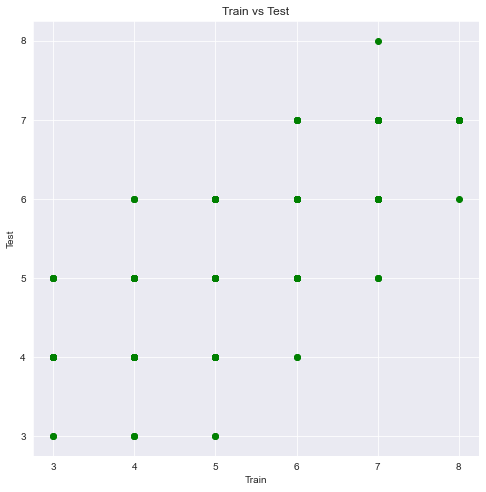

In [867]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions, c='green')
plt.xlabel("Train")
plt.ylabel("Test")
plt.title("Train vs Test")
plt.show()

In [868]:
rf_to_plot = RandomForestClassifier(n_estimators=26)

rf_to_plot.fit(X_train,y_train)

RandomForestClassifier(n_estimators=26)

<AxesSubplot:xlabel='importance', ylabel='features'>

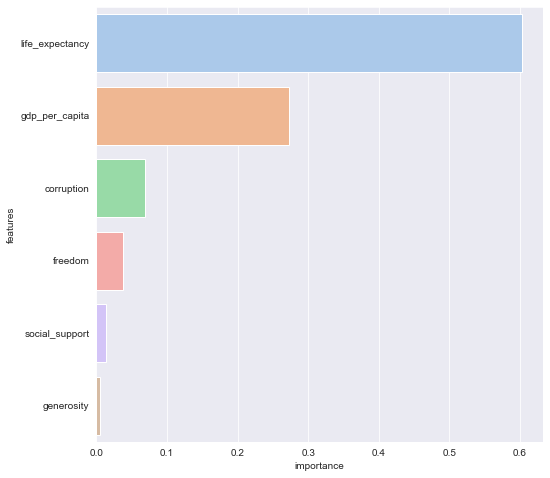

In [869]:
df = pd.DataFrame({'features': X_train.columns, 'importance': rf_to_plot.feature_importances_})\
                    .sort_values('importance', ascending= False)
plt.figure(figsize=(8,8))
sns.barplot(x = 'importance', y = 'features', data = df.head(10), orient='h', palette='pastel')

Using Random Forest Classifier to predict the 2021 ladder score (Happiness scores) from the 2021 World Happiness Report

In [833]:
data_2 = rf_whr_2021.loc[rf_whr_2021['ladder_score'] != 0]

# Set the rounded features as integers
data_2['ladder_score'] = data_2['ladder_score'].round()
data_2['ladder_score'] = data_2['ladder_score'].astype('int64')

data_2['gdp_per_capita'] = data_2['gdp_per_capita'].round()
data_2['gdp_per_capita'] = data_2['gdp_per_capita'].astype('int64')

data_2['social_support'] = data_2['social_support'].round()
data_2['social_support'] = data_2['social_support'].astype('int64')

data_2['life_expectancy'] = data_2['life_expectancy'].round()
data_2['life_expectancy'] = data_2['life_expectancy'].astype('int64')

data_2['freedom'] = data_2['freedom'].round()
data_2['freedom'] = data_2['freedom'].astype('int64')

data_2['generosity'] = data_2['generosity'].round()
data_2['generosity'] = data_2['generosity'].astype('int64')

data_2['corruption'] = data_2['corruption'].round()
data_2['corruption'] = data_2['corruption'].astype('int64')

#Dropping features

new_set=data_2.drop(['country', 'year', 'region'], axis=1)

In [843]:
# Random forest for feature importance on a classification problem
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils.multiclass import type_of_target
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

#Declaring feature data and target data
X = new_set.drop(['ladder_score'], axis=1)
y = new_set['ladder_score']

In [844]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [845]:
rf = RandomForestClassifier(n_estimators=15, random_state = 0)
rf.fit(X_train,y_train)

rf_score_train = rf.score(X_train,y_train)
print("Training score: ", rf_score_train)

rf_score_test = rf.score(X_test, y_test)
print("Testing score: ", rf_score_test)
 #prediction
predictions=rf.predict(X_test)






Training score:  0.8067226890756303
Testing score:  0.5


In [846]:
predictions[:5]

array([5, 5, 6, 7, 5])

In [847]:
#Confusion Matrix
array_2 = (metrics.confusion_matrix(y_true=y_test, y_pred = predictions))


<AxesSubplot:>

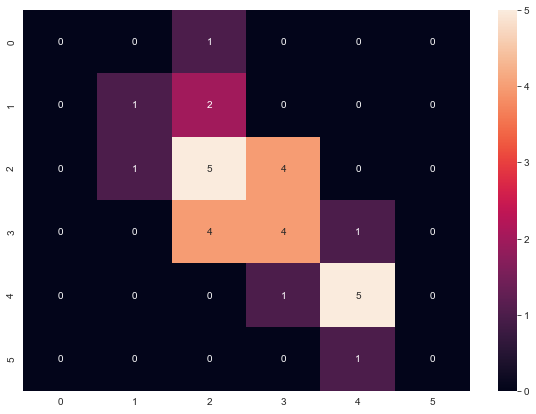

In [848]:
cm_2 = pd.DataFrame(array_2)
plt.figure(figsize = (10,7))
sns.heatmap(cm_2, annot=True)

In [849]:
y_test.value_counts()

5    10
6     9
7     6
4     3
8     1
3     1
Name: ladder_score, dtype: int64

In [854]:
# Accuracy
print('Accuracy Score (TP+TN)/Total %r:'%metrics.accuracy_score(predictions, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Accuracy Score (TP+TN)/Total 0.5:
Mean Absolute Error: 0.5333333333333333
Mean Squared Error: 0.6
Root Mean Squared Error: 0.7745966692414834


The model has a high RSME score and MSE. This resulted in a 50% accuracy. 

In [851]:
#metrics
print(metrics.classification_report(y_true = y_test, y_pred =predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.33      0.40         3
           5       0.42      0.50      0.45        10
           6       0.44      0.44      0.44         9
           7       0.71      0.83      0.77         6
           8       0.00      0.00      0.00         1

    accuracy                           0.50        30
   macro avg       0.35      0.35      0.34        30
weighted avg       0.47      0.50      0.48        30



Model Analysis: The model performed with 57% accuracy on the data set. The model performed with 78% accuracy on the training data. The model did make predictions for all classes expect ladder score 3. The f1-score is high for ladder score 7 (71%) and low for 3 (0), which could be due to the poor recall of those classes.

In [852]:
# Test and predictions scatter plot


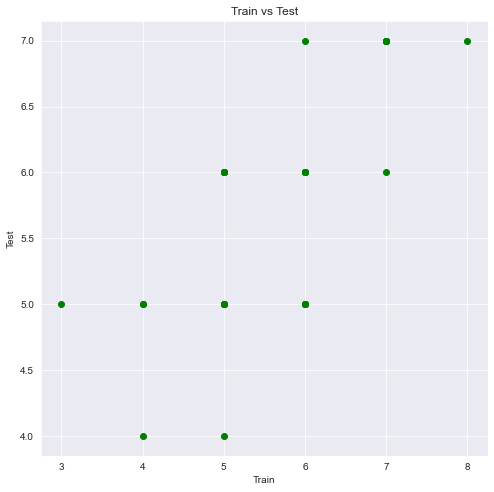

In [853]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions, c='green')
plt.xlabel("Train")
plt.ylabel("Test")
plt.title("Train vs Test")
plt.show()

In [855]:
rf_to_plot = RandomForestClassifier(n_estimators=26)

rf_to_plot.fit(X_train,y_train)

RandomForestClassifier(n_estimators=26)

<AxesSubplot:xlabel='importance', ylabel='features'>

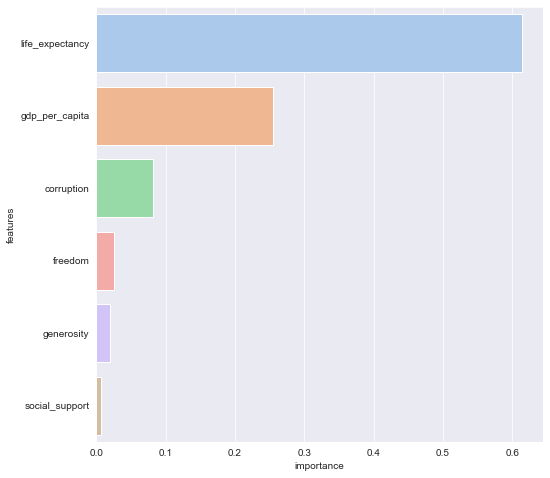

In [856]:
df = pd.DataFrame({'features': X_train.columns, 'importance': rf_to_plot.feature_importances_})\
                    .sort_values('importance', ascending= False)
plt.figure(figsize=(8,8))
sns.barplot(x = 'importance', y = 'features', data = df.head(10), orient='h', palette='pastel')

### KNN

KNN to predict the ladder score (Happiness scores) from the World Happiness Report

In [1104]:
data = whr.loc[whr['ladder_score'] != 0]

# Set the rounded features as integers
data['ladder_score'] = data['ladder_score'].round()
data['ladder_score'] = data['ladder_score'].astype('int64')

data['gdp_per_capita'] = data['gdp_per_capita'].round()
data['gdp_per_capita'] = data['gdp_per_capita'].astype('int64')

data['social_support'] = data['social_support'].round()
data['social_support'] = data['social_support'].astype('int64')

data['life_expectancy'] = data['life_expectancy'].round()
data['life_expectancy'] = data['life_expectancy'].astype('int64')

data['freedom'] = data['freedom'].round()
data['freedom'] = data['freedom'].astype('int64')

data['generosity'] = data['generosity'].round()
data['generosity'] = data['generosity'].astype('int64')

data['corruption'] = data['corruption'].round()
data['corruption'] = data['corruption'].astype('int64')

ns=data.drop(['country', 'year', 'region'], axis=1)

In [1105]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1106]:
#Declaring feature data and target data
X = ns.drop(['ladder_score'], axis=1)
y = ns['ladder_score']

In [1107]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

kn = KNeighborsClassifier()

                                   
parameters = {'n_neighbors':[1,35]}

gs = GridSearchCV(kn, parameters, scoring = 'f1_micro')

gs.fit(X_train, y_train)
 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 35]}, scoring='f1_micro')

In [1108]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [1109]:
predictions = rf.predict(X_test)

In [1110]:
array = metrics.confusion_matrix(y_true=y_test, y_pred=predictions)

<AxesSubplot:>

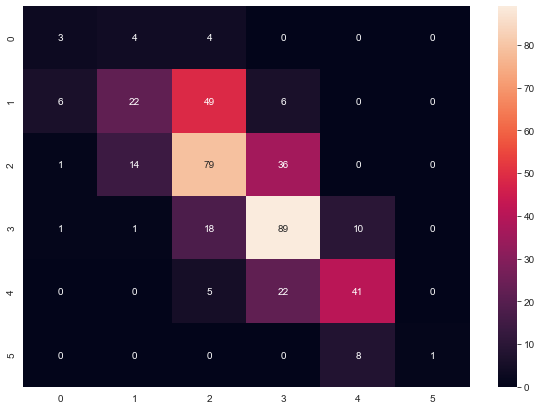

In [1111]:
cm = pd.DataFrame(array)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

In [1112]:
print(metrics.classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           3       0.27      0.27      0.27        11
           4       0.54      0.27      0.35        83
           5       0.51      0.61      0.55       130
           6       0.58      0.75      0.65       119
           7       0.69      0.60      0.65        68
           8       1.00      0.11      0.20         9

    accuracy                           0.56       420
   macro avg       0.60      0.43      0.45       420
weighted avg       0.57      0.56      0.54       420



The model has a 56% accuracy with overall low f1 scores.

KNN to predict the ladder score (Happiness scores) from the past World Happiness Report

In [896]:
data_1 = rf_past_whr.loc[rf_past_whr['ladder_score'] != 0]

# Set the rounded features as integers
data_1['ladder_score'] = data_1['ladder_score'].round()
data_1['ladder_score'] = data_1['ladder_score'].astype('int64')

data_1['gdp_per_capita'] = data_1['gdp_per_capita'].round()
data_1['gdp_per_capita'] = data_1['gdp_per_capita'].astype('int64')

data_1['social_support'] = data_1['social_support'].round()
data_1['social_support'] = data_1['social_support'].astype('int64')

data_1['life_expectancy'] = data_1['life_expectancy'].round()
data_1['life_expectancy'] = data_1['life_expectancy'].astype('int64')

data_1['freedom'] = data_1['freedom'].round()
data_1['freedom'] = data_1['freedom'].astype('int64')

data_1['generosity'] = data_1['generosity'].round()
data_1['generosity'] = data_1['generosity'].astype('int64')

data_1['corruption'] = data_1['corruption'].round()
data_1['corruption'] = data_1['corruption'].astype('int64')

ns=data_1.drop(['country', 'year', 'region'], axis=1)

In [897]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [898]:
#Declaring feature data and target data
X = ns.drop(['ladder_score'], axis=1)
y = ns['ladder_score']

In [899]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

kn = KNeighborsClassifier()

                                   
parameters = {'n_neighbors':[1,20]}

gs = GridSearchCV(kn, parameters, scoring = 'f1_micro')

gs.fit(X_train, y_train)
 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 20]}, scoring='f1_micro')

In [900]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [901]:
predictions = rf.predict(X_test)

In [902]:
array_1 = metrics.confusion_matrix(y_true=y_test, y_pred=predictions)

<AxesSubplot:>

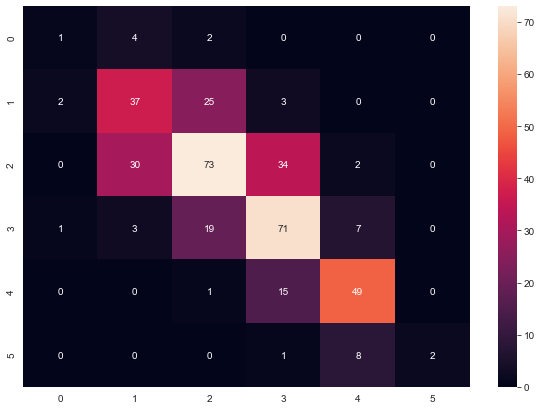

In [903]:
cm_1 = pd.DataFrame(array_1)
plt.figure(figsize = (10,7))
sns.heatmap(cm_1, annot=True)

In [904]:
print(metrics.classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           3       0.25      0.14      0.18         7
           4       0.50      0.55      0.52        67
           5       0.61      0.53      0.56       139
           6       0.57      0.70      0.63       101
           7       0.74      0.75      0.75        65
           8       1.00      0.18      0.31        11

    accuracy                           0.60       390
   macro avg       0.61      0.48      0.49       390
weighted avg       0.61      0.60      0.59       390



The model has a 60% accuracy with highher f1 scores than the f1 score above that included all the data.

Using KNN to predict the 2021 ladder score (Happiness scores) from the 2021 World Happiness Report

In [906]:
data_2 = rf_whr_2021.loc[rf_whr_2021['ladder_score'] != 0]

# Set the rounded features as integers
data_2['ladder_score'] = data_2['ladder_score'].round()
data_2['ladder_score'] = data_2['ladder_score'].astype('int64')

data_2['gdp_per_capita'] = data_2['gdp_per_capita'].round()
data_2['gdp_per_capita'] = data_2['gdp_per_capita'].astype('int64')

data_2['social_support'] = data_2['social_support'].round()
data_2['social_support'] = data_2['social_support'].astype('int64')

data_2['life_expectancy'] = data_2['life_expectancy'].round()
data_2['life_expectancy'] = data_2['life_expectancy'].astype('int64')

data_2['freedom'] = data_2['freedom'].round()
data_2['freedom'] = data_2['freedom'].astype('int64')

data_2['generosity'] = data_2['generosity'].round()
data_2['generosity'] = data_2['generosity'].astype('int64')

data_2['corruption'] = data_2['corruption'].round()
data_2['corruption'] = data_2['corruption'].astype('int64')

#Dropping features

new_set=data_2.drop(['country', 'year', 'region'], axis=1)

In [907]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [908]:
#Declaring feature data and target data
X = new_set.drop(['ladder_score'], axis=1)
y = new_set['ladder_score']

In [909]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

kn = KNeighborsClassifier()

                                   
parameters = {'n_neighbors':[1,20]}

gs = GridSearchCV(kn, parameters, scoring = 'f1_micro')

gs.fit(X_train, y_train)



GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 20]}, scoring='f1_micro')

In [910]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [911]:
predictions = rf.predict(X_test)

In [912]:
array_2 = metrics.confusion_matrix(y_true=y_test, y_pred=predictions)

<AxesSubplot:>

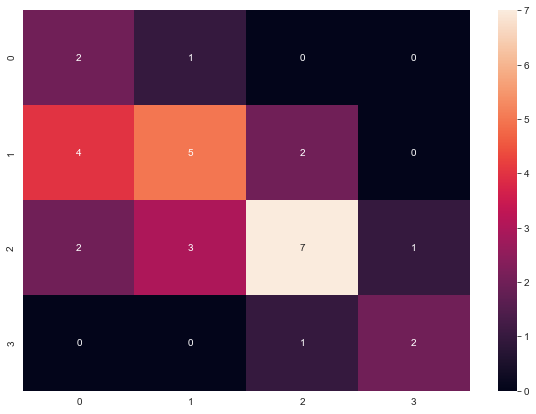

In [913]:
cm_2 = pd.DataFrame(array_2)
plt.figure(figsize = (10,7))
sns.heatmap(cm_2, annot=True)

In [914]:
print(metrics.classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           4       0.25      0.67      0.36         3
           5       0.56      0.45      0.50        11
           6       0.70      0.54      0.61        13
           7       0.67      0.67      0.67         3

    accuracy                           0.53        30
   macro avg       0.54      0.58      0.53        30
weighted avg       0.60      0.53      0.55        30



The model has a 53% accuracy with lowest f1 scores.

### xgboost

Using xgboost to predict the 2021 ladder score (Happiness scores) from the World Happiness Report

In [1126]:
data = whr.loc[whr['ladder_score'] != 0]

# Set the rounded features as integers
data['ladder_score'] = data['ladder_score'].round()
data['ladder_score'] = data['ladder_score'].astype('int64')

data['gdp_per_capita'] = data['gdp_per_capita'].round()
data['gdp_per_capita'] = data['gdp_per_capita'].astype('int64')

data['social_support'] = data['social_support'].round()
data['social_support'] = data['social_support'].astype('int64')

data['life_expectancy'] = data['life_expectancy'].round()
data['life_expectancy'] = data['life_expectancy'].astype('int64')

data['freedom'] = data['freedom'].round()
data['freedom'] = data['freedom'].astype('int64')

data['generosity'] = data['generosity'].round()
data['generosity'] = data['generosity'].astype('int64')

data['corruption'] = data['corruption'].round()
data['corruption'] = data['corruption'].astype('int64')

ns=data.drop(['country', 'year', 'region'], axis=1)

In [1127]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1128]:
#Declaring feature data and target data
X = ns.drop(['ladder_score'], axis=1)
y = ns['ladder_score']

In [1129]:
# split data into train and test sets
seed = 3
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [1130]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[07:44:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 55.95%


In [1131]:
#metrics
print(metrics.classification_report(y_true = y_test, y_pred =predictions))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.25      0.07      0.11        14
           4       0.54      0.57      0.56        70
           5       0.55      0.54      0.55       141
           6       0.52      0.69      0.60       109
           7       0.72      0.58      0.64        74
           8       0.00      0.00      0.00        11

    accuracy                           0.56       420
   macro avg       0.37      0.35      0.35       420
weighted avg       0.55      0.56      0.55       420



The model has a 56% accuracy with a predictions for all classes expect score 2.

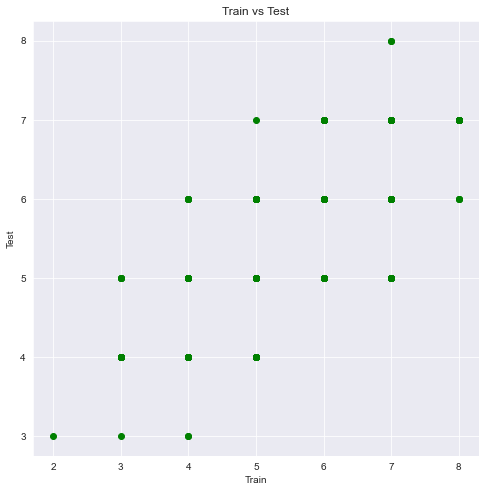

In [1132]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions, c='green')
plt.xlabel("Train")
plt.ylabel("Test")
plt.title("Train vs Test")
plt.show()

Using xgboost to predict the 2021 ladder score (Happiness scores) from the past World Happiness Report

In [937]:
data_1 = rf_past_whr.loc[rf_past_whr['ladder_score'] != 0]

# Set the rounded features as integers
data_1['ladder_score'] = data_1['ladder_score'].round()
data_1['ladder_score'] = data_1['ladder_score'].astype('int64')

data_1['gdp_per_capita'] = data_1['gdp_per_capita'].round()
data_1['gdp_per_capita'] = data_1['gdp_per_capita'].astype('int64')

data_1['social_support'] = data_1['social_support'].round()
data_1['social_support'] = data_1['social_support'].astype('int64')

data_1['life_expectancy'] = data_1['life_expectancy'].round()
data_1['life_expectancy'] = data_1['life_expectancy'].astype('int64')

data_1['freedom'] = data_1['freedom'].round()
data_1['freedom'] = data_1['freedom'].astype('int64')

data_1['generosity'] = data_1['generosity'].round()
data_1['generosity'] = data_1['generosity'].astype('int64')

data_1['corruption'] = data_1['corruption'].round()
data_1['corruption'] = data_1['corruption'].astype('int64')

ns=data_1.drop(['country', 'year', 'region'], axis=1)

In [938]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [939]:
#Declaring feature data and target data
X = ns.drop(['ladder_score'], axis=1)
y = ns['ladder_score']

In [940]:
# split data into train and test sets
seed = 3
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [941]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[02:18:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 56.92%


In [942]:
#metrics
print(metrics.classification_report(y_true = y_test, y_pred =predictions))

              precision    recall  f1-score   support

           3       0.50      0.21      0.30        14
           4       0.64      0.49      0.56        79
           5       0.49      0.56      0.52       110
           6       0.54      0.66      0.59       101
           7       0.72      0.68      0.70        75
           8       0.00      0.00      0.00        11

    accuracy                           0.57       390
   macro avg       0.48      0.44      0.45       390
weighted avg       0.56      0.57      0.56       390



The model has a 57% accuracy with a predictions.

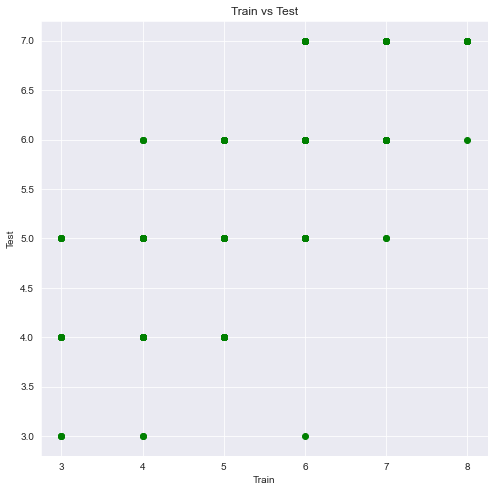

In [943]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions, c='green')
plt.xlabel("Train")
plt.ylabel("Test")
plt.title("Train vs Test")
plt.show()

Using xgboost to predict the 2021 ladder score (Happiness scores) from the 2021 World Happiness Report

In [129]:
#Installed xgboost
#!pip install xgboost

#!pip install --upgrade xgboost


Requirement already up-to-date: xgboost in /Users/kristinabiron/opt/anaconda3/lib/python3.8/site-packages (1.4.1)


In [930]:
data_2 = rf_whr_2021.loc[rf_whr_2021['ladder_score'] != 0]

# Set the rounded features as integers
data_2['ladder_score'] = data_2['ladder_score'].round()
data_2['ladder_score'] = data_2['ladder_score'].astype('int64')

data_2['gdp_per_capita'] = data_2['gdp_per_capita'].round()
data_2['gdp_per_capita'] = data_2['gdp_per_capita'].astype('int64')

data_2['social_support'] = data_2['social_support'].round()
data_2['social_support'] = data_2['social_support'].astype('int64')

data_2['life_expectancy'] = data_2['life_expectancy'].round()
data_2['life_expectancy'] = data_2['life_expectancy'].astype('int64')

data_2['freedom'] = data_2['freedom'].round()
data_2['freedom'] = data_2['freedom'].astype('int64')

data_2['generosity'] = data_2['generosity'].round()
data_2['generosity'] = data_2['generosity'].astype('int64')

data_2['corruption'] = data_2['corruption'].round()
data_2['corruption'] = data_2['corruption'].astype('int64')

#Dropping features

new_set=data_2.drop(['country', 'year', 'region'], axis=1)

In [931]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [932]:
#Declaring feature data and target data
X = new_set.drop(['ladder_score'], axis=1)
y = new_set['ladder_score']

In [933]:
# split data into train and test sets
seed = 3
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [934]:
# fit model no training data
model = XGBClassifier(n_jobs = 1,
    objective = 'multi:softmax',
    silent=1,
    tree_method='approx')
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[02:14:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:14:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 60.00%


In [935]:
#metrics
print(metrics.classification_report(y_true = y_test, y_pred =predictions))

              precision    recall  f1-score   support

           4       0.67      0.50      0.57         4
           5       0.57      0.44      0.50         9
           6       0.64      0.82      0.72        11
           7       0.50      0.60      0.55         5
           8       0.00      0.00      0.00         1

    accuracy                           0.60        30
   macro avg       0.48      0.47      0.47        30
weighted avg       0.58      0.60      0.58        30



The model has a 60% accuracy with a predictions for all classes. This was the best preformance on xgboost and this contained less data. 

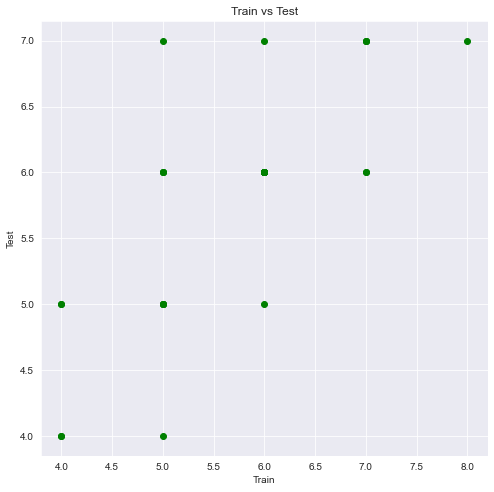

In [936]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions, c='green')
plt.xlabel("Train")
plt.ylabel("Test")
plt.title("Train vs Test")
plt.show()

### Result
More data did improve the baseline score and accuracy for Linear Regression and Random Forest 

The elimination of features caused a decrease in the models performance

Linear Regression model had a higher performance

Xgboost was the only model to perform better when using 2021 World Happiness Report



### Improvement
Model

More data is needed for better model results

The models needed more refinement and feature engineering 

The data needed more cleaning to capture a balance of overfitting, and underfitting

Data

Data used is based on survey results

Countries volunteer to participate 


### Clustering Data

Examining if higher life expectancy results in believing in being more generous

In [348]:
#Perform Clustering
# Clustering methods are unsupervised methods, there is no outcome that we're trying to predict here
# But the effort is to see patterns in data that hasn't been observed before
# Perform a K means clustering.

In [1155]:
#Using r_past_whr the max year each countries that participated in the World Happiness Report 
m_data = whr.drop(columns = 'year')

In [1156]:
#limiting to 2 features

ud = m_data[['life_expectancy', 'gdp_per_capita']]

In [1157]:
from sklearn.cluster import KMeans

n_clusters = []
inertias = []

for i in range(1,30):

    km = KMeans(n_clusters=i)
    
    km.fit(unsupervised_data)
    inertia = km.inertia_
    
    
    n_clusters.append(i)
    inertias.append(inertia)
    print(inertia)
    print('------')

7998.57330240523
------
2292.553467655206
------
1193.3163105133794
------
695.1706394864541
------
449.3645532435472
------
339.2130095707386
------
260.4598047322923
------
224.55779743648463
------
196.2073880529062
------
163.62930794128326
------
137.66878297213668
------
129.30523818182576
------
115.62086796051292
------
107.53327074028383
------
97.60035835794471
------
89.2101572205224
------
82.21212174616446
------
77.51207953783086
------
66.18914664601937
------
63.35978665675904
------
60.05652332344903
------
55.214401068828316
------
51.258542751770875
------
48.80633593230508
------
45.21393679592028
------
42.065962215289375
------
40.188624125990856
------
40.484754409071044
------
35.5639798666759
------


[]

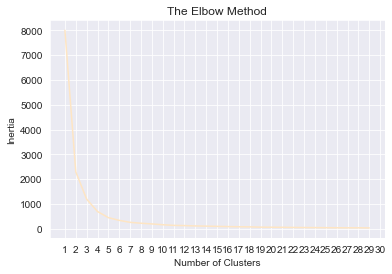

In [1158]:
plt.plot( n_clusters, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.xticks(ticks = range(1,31))
plt.plot()

In [1159]:
km = KMeans(n_clusters=4)

clusters = km.fit_predict(ud)

centroids = km.cluster_centers_
print(centroids)

[[71.64628492 10.60022701]
 [57.31536768  8.3412691 ]
 [65.27472124  9.54382408]
 [48.90444397  7.76698349]]


The initial K-Means cluster plot seems to indicate that the populations with higher. life expectancy tend to be in regions with higher GPD per capita. 

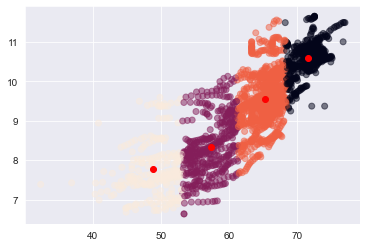

In [1160]:
plt.scatter(ud['life_expectancy'], ud['gdp_per_capita'], c= km.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()         